In [ ]:
!pip3 install git+https://github.com/am1tyadav/tfutils.git

In [42]:
#Task 5: Generative Adversarial Network (GAN)
input_layer = tf.keras.layers. Input (shape=(noise_dim,))
gen_out =  generator(input_layer)
disc_out = discriminator (gen_out)
gan = Model( input_layer, disc_out)
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
gan.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1)]               0         
                                                                 
 sequential_11 (Sequential)  (None, 28, 28, 1)         2717025   
                                                                 
 sequential_10 (Sequential)  (None, 1)                 1027073   
                                                                 
Total params: 3,744,098
Trainable params: 2,716,065
Non-trainable params: 1,028,033
_________________________________________________________________


Steps per epoch= 107


<IPython.core.display.Javascript object>


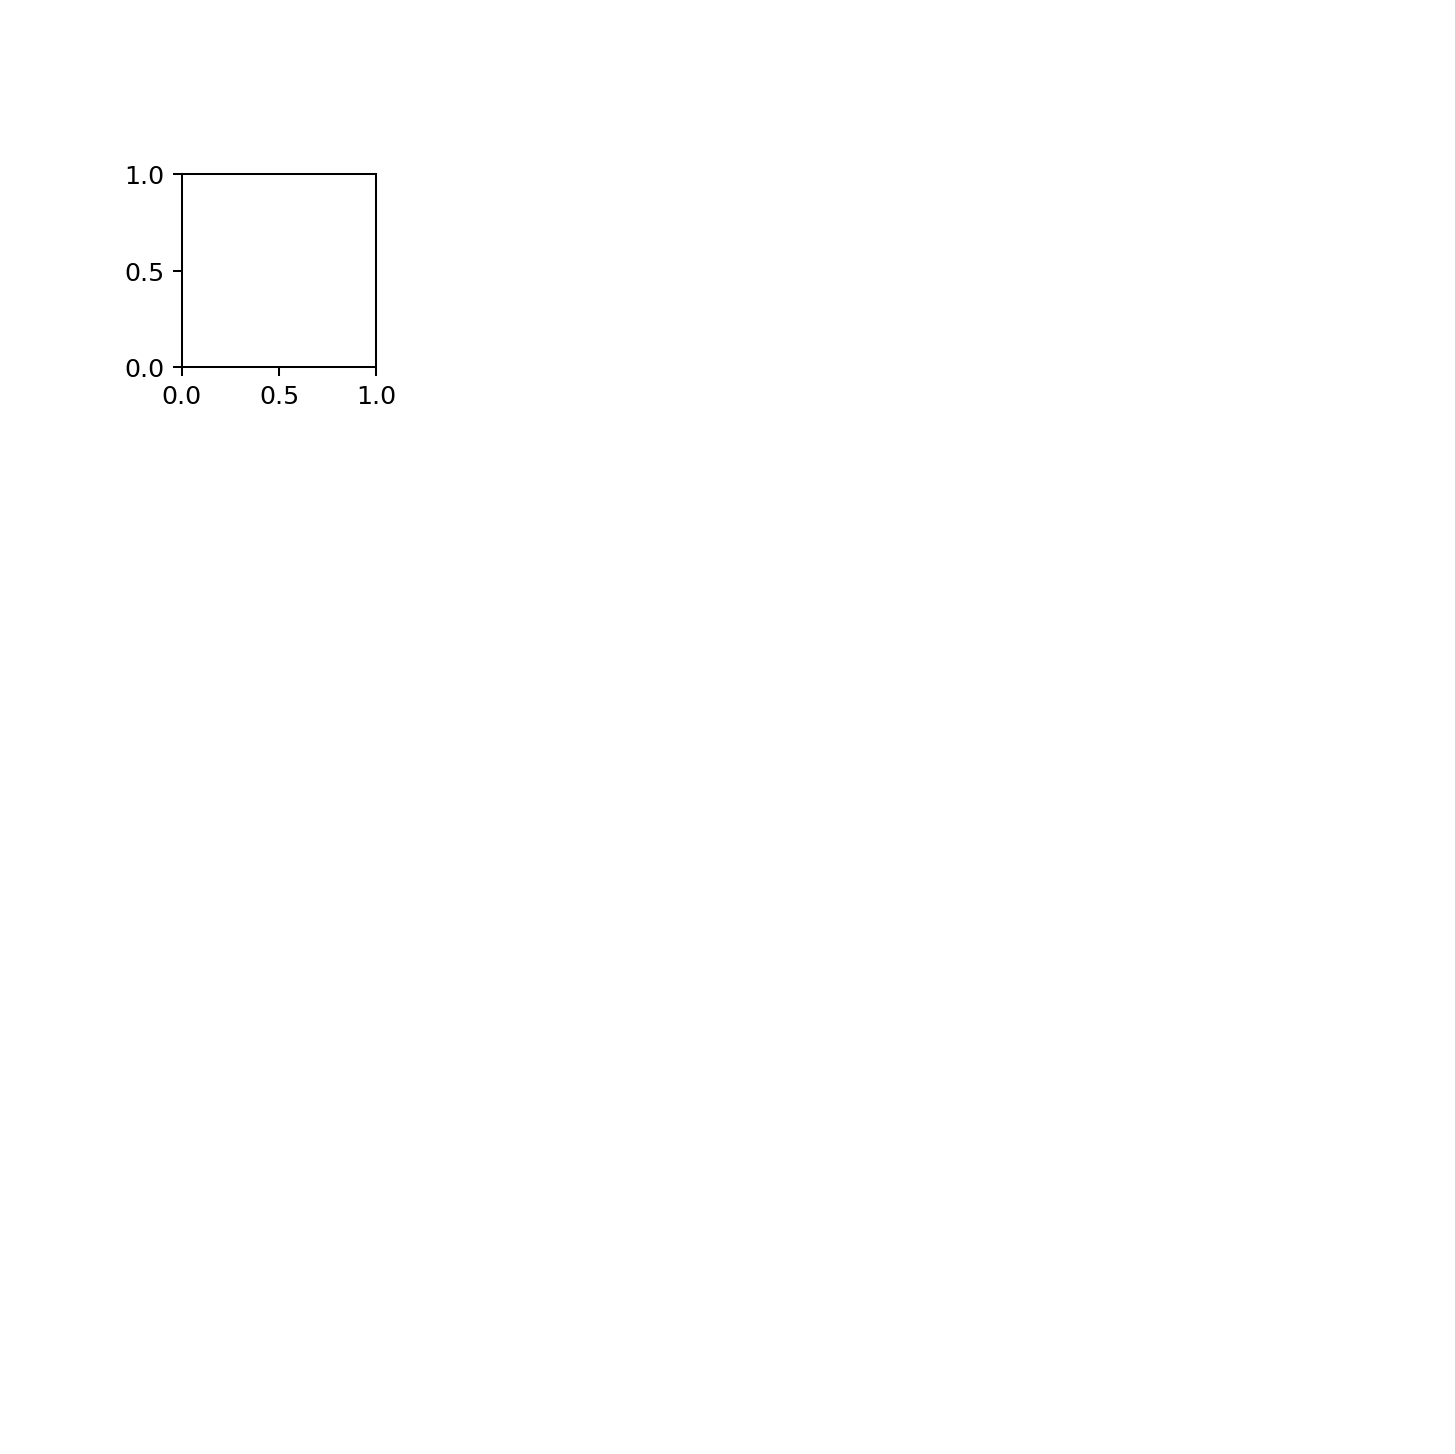

2/2 [==============================] - 0s 23ms/step


ValueError: too many values to unpack (expected 1)

In [43]:

%%time
epochs = 5 
batch_size=128
steps_per_epoch =  int (2 * x.shape[0]/batch_size)
print('Steps per epoch=', steps_per_epoch)

dp = tfutils.plotting.DynamicPlot (plt, 5, 5, (8, 8))
for e in range(0, epochs):
    dp.start_of_epoch(e)
    for step in range(0, steps_per_epoch):

        true_examples=x[int(batch_size/2)*step: int(batch_size/2)*(step + 1)]
        true_examples=np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))

        noise = np.random.randn(int(batch_size/2), noise_dim) 
        generated_examples = generator.predict(noise)
        
        x_batch=np.concatenate([generated_examples, true_examples], axis=0)
        y_batch=np.array([0] * int(batch_size/2)+[1]* int(batch_size/2))

        indices = np.random.choice (range(batch_size), batch_size, replace=False) 
        x_batch = x_batch[indices]
        y_batch=y_batch[indices]
        
        # train the discriminator
        discriminator.trainable = True
        discriminator.train_on_batch (x_batch, y_batch)
        discriminator.trainable = False
        # train the generator
        loss, =gan.train_on_batch (noise, np.ones((int(batch_size/2), 1)))
        _,acc =  discriminator.evaluate(x_batch, y_batch, verbose=False)
    noise=np.random.randn(1, noise_dim)
    generated_example = generator.predict(noise)[0]
    dp.end_of_epoch (np.reshape(generated_example, (28, 28)), 'binary',
        'DiscAcc:{:.2f}'.format(acc), 'GANLoss: {:.2f}'.format(loss))

In [ ]:
%%time

epochs = 25
batch_size = 128
steps_per_epoch = int(2 * x.shape[0]/batch_size)

print('Steps per epoch=', steps_per_epoch)

dp = tfutils.plotting.DynamicPlot(plt, 5, 5, (8, 8))

for e in range(0, epochs):
    
    dp.start_of_epoch(e)
    
    for step in range(0, steps_per_epoch):
        true_examples = x[int(batch_size/2)*step: int(batch_size/2)*(step + 1)]
        true_examples = np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))

        noise = np.random.randn(int(batch_size/2), noise_dim)
        generated_examples = generator.predict(noise)

        x_batch = np.concatenate([generated_examples, true_examples], axis=0)
        y_batch = np.array([0] * int(batch_size/2) + [1] * int(batch_size/2))

        indices = np.random.choice(range(batch_size), batch_size, replace=False)
        x_batch = x_batch[indices]
        y_batch = y_batch[indices]

        # train the discriminator
        discriminator.trainable = True
        discriminator.train_on_batch(x_batch, y_batch)
        discriminator.trainable = False

        # train the generator
        loss, _ = gan.train_on_batch(noise, np.ones((int(batch_size/2), 1)))

        _, acc = discriminator.evaluate(x_batch, y_batch, verbose=False)

    noise = np.random.randn(1, noise_dim)
    generated_example = generator.predict(noise)[0]
    
    dp.end_of_epoch(np.reshape(generated_example, (28, 28)), 'binary',
                   'DiscAcc:{:.2f}'.format(acc), 'GANLoss:{:.2f}'.format(loss))

TensorFlow version: 2.12.0


<IPython.core.display.Javascript object>


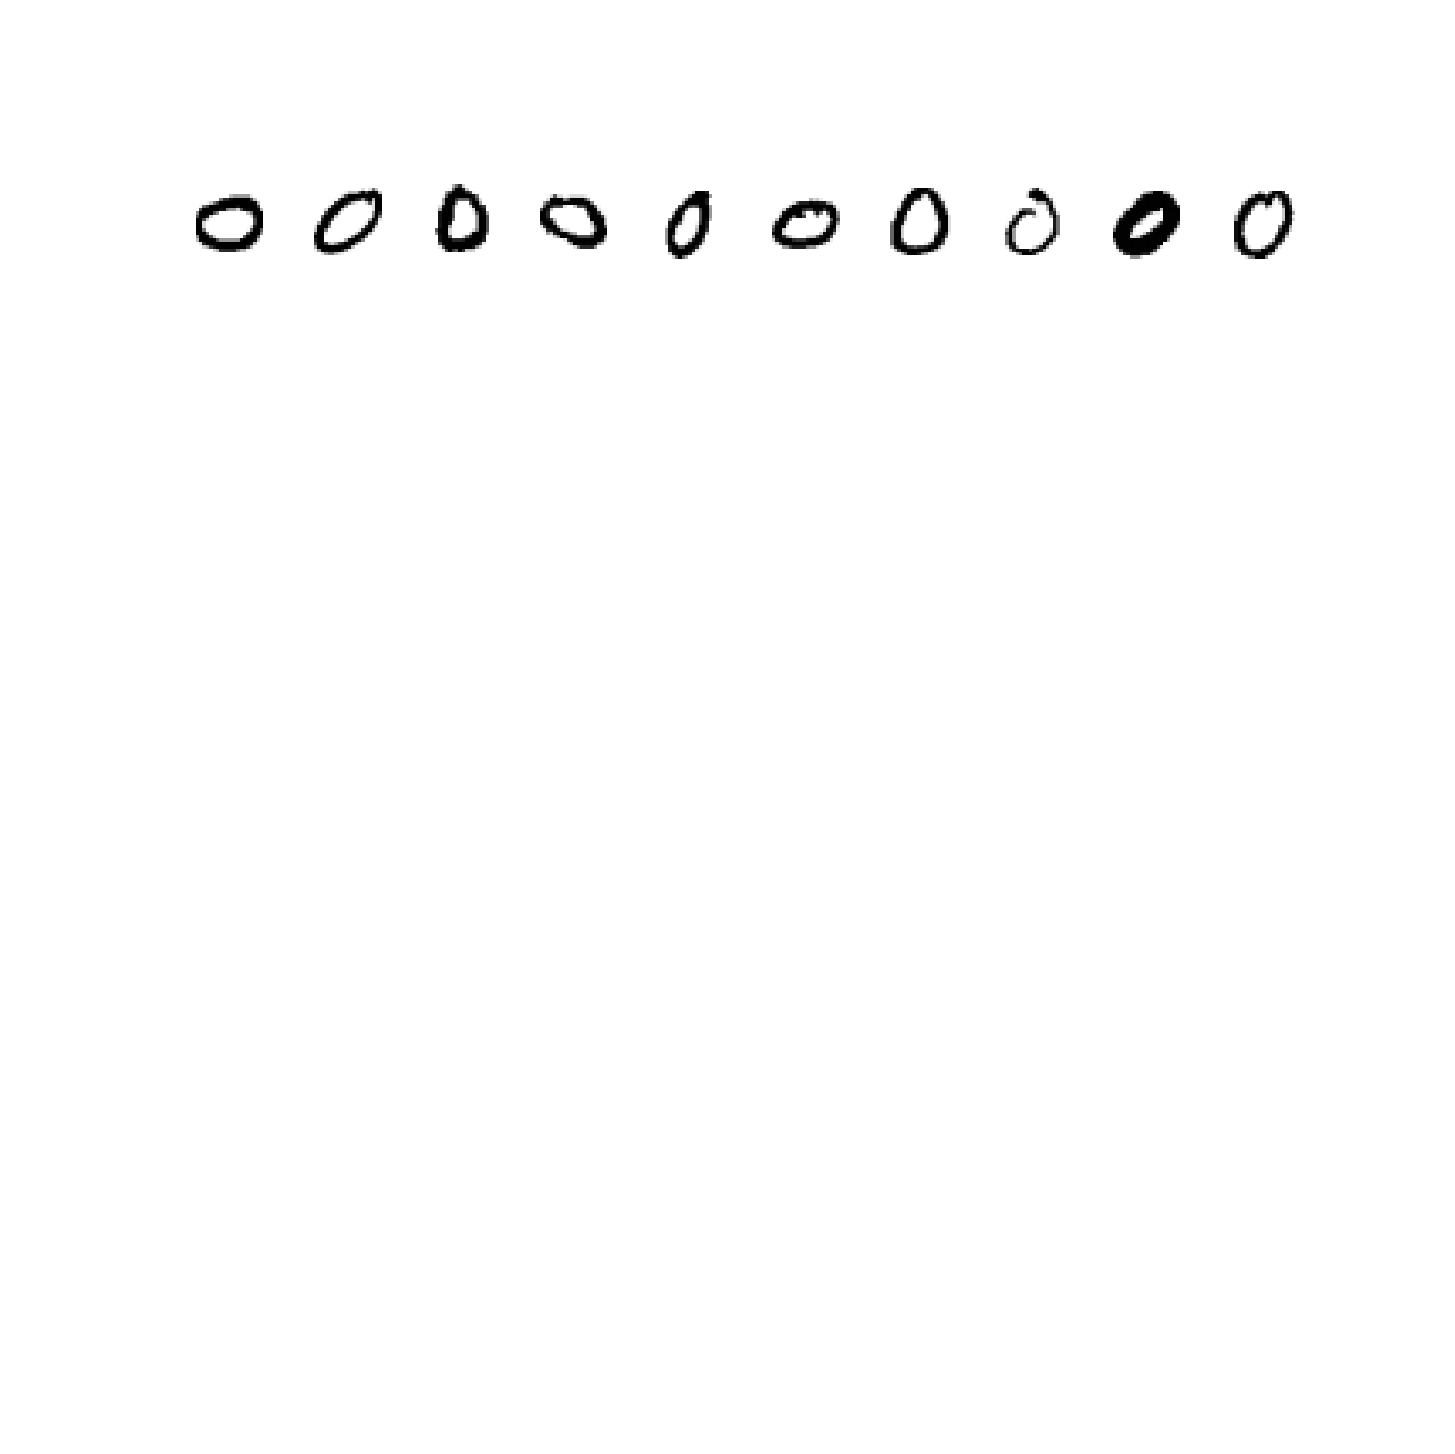

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 13, 13, 64)        640       
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 13, 13, 64)        0         
                                                                 
 batch_normalization_61 (Bat  (None, 13, 13, 64)       256       
 chNormalization)                                                
                                                                 
 conv2d_34 (Conv2D)          (None, 5, 5, 128)         204928    
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 5, 5, 128)         0         
                                                                 
 batch_normalization_62 (Bat  (None, 5, 5, 128)        512       
 chNormalization)                                    

<IPython.core.display.Javascript object>


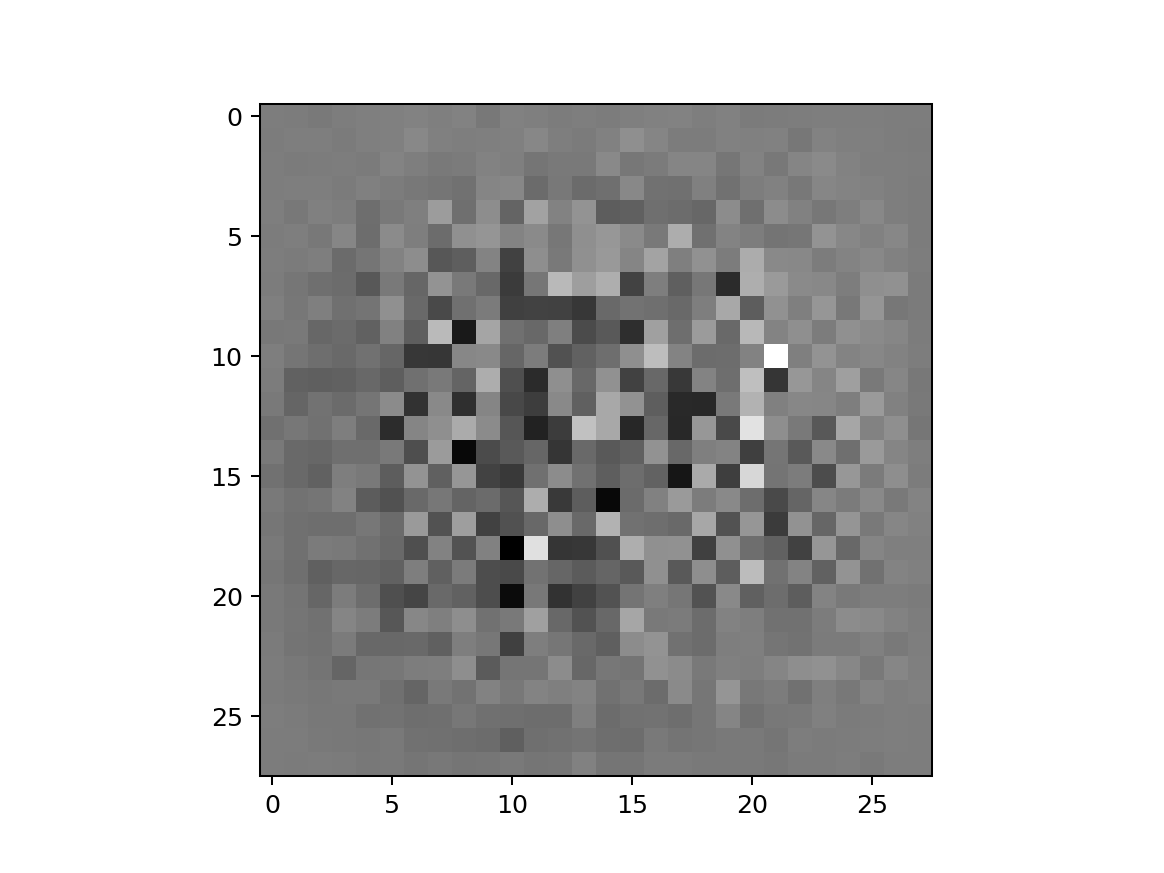

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 1)]               0         
                                                                 
 sequential_19 (Sequential)  (None, 28, 28, 1)         2717025   
                                                                 
 sequential_18 (Sequential)  (None, 1)                 1027073   
                                                                 
Total params: 3,744,098
Trainable params: 2,716,065
Non-trainable params: 1,028,033
_________________________________________________________________
Steps per epoch= 107
1/1 [==============================] - 0s 32ms/step


<IPython.core.display.Javascript object>


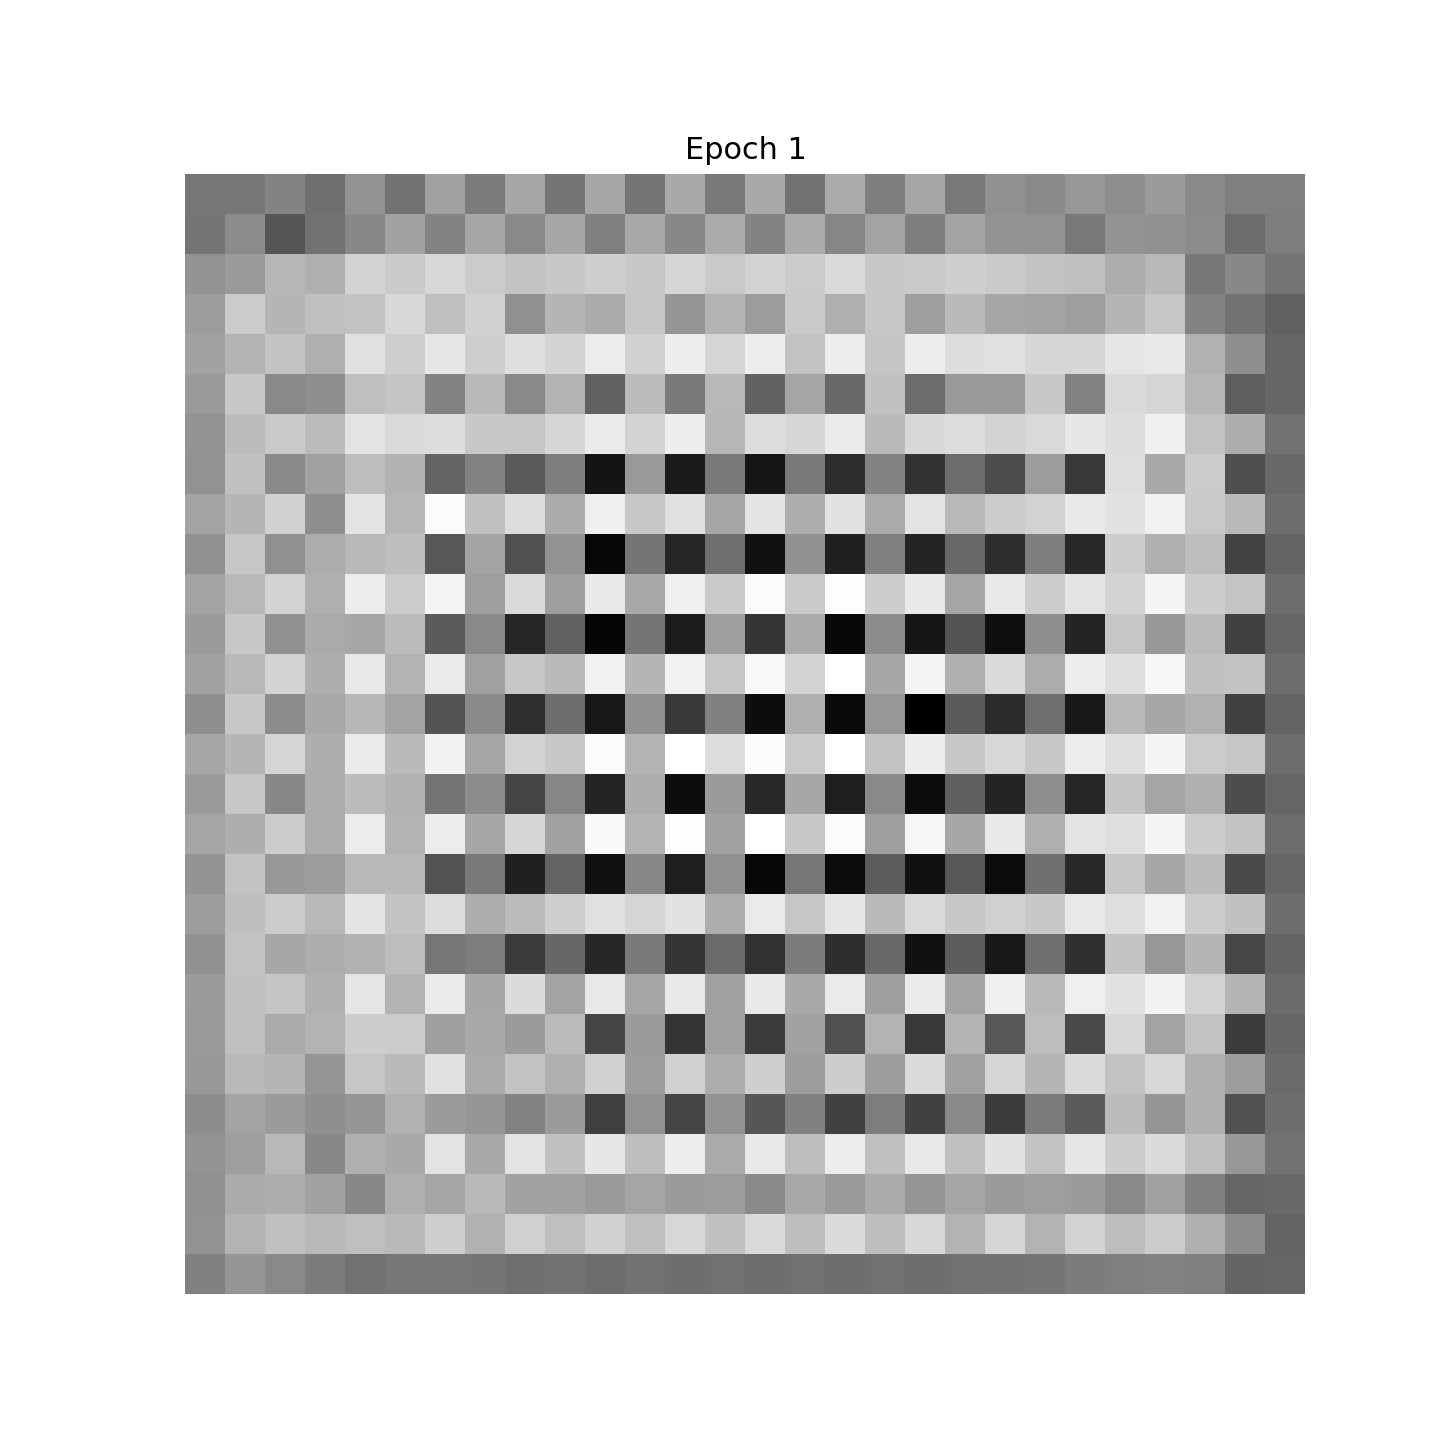

1/1 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>


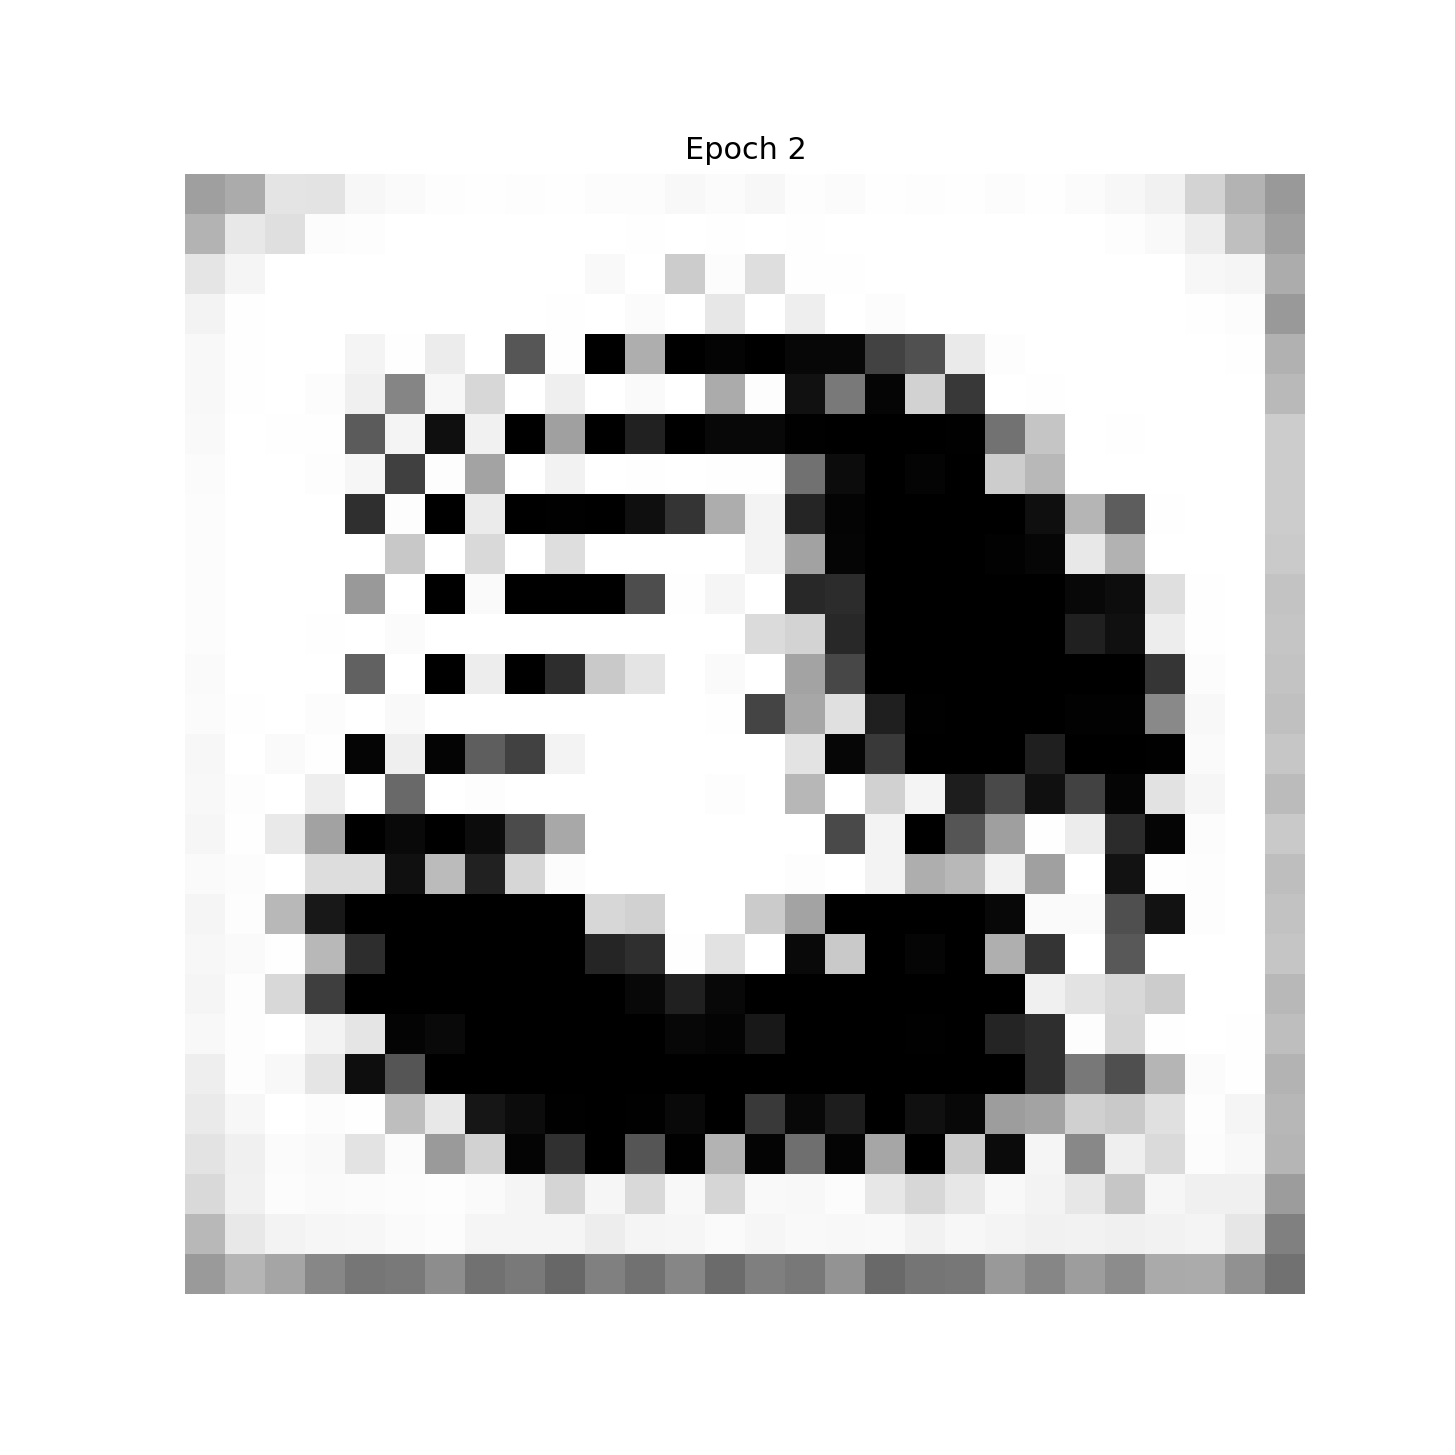

1/1 [==============================] - 0s 45ms/step


<IPython.core.display.Javascript object>


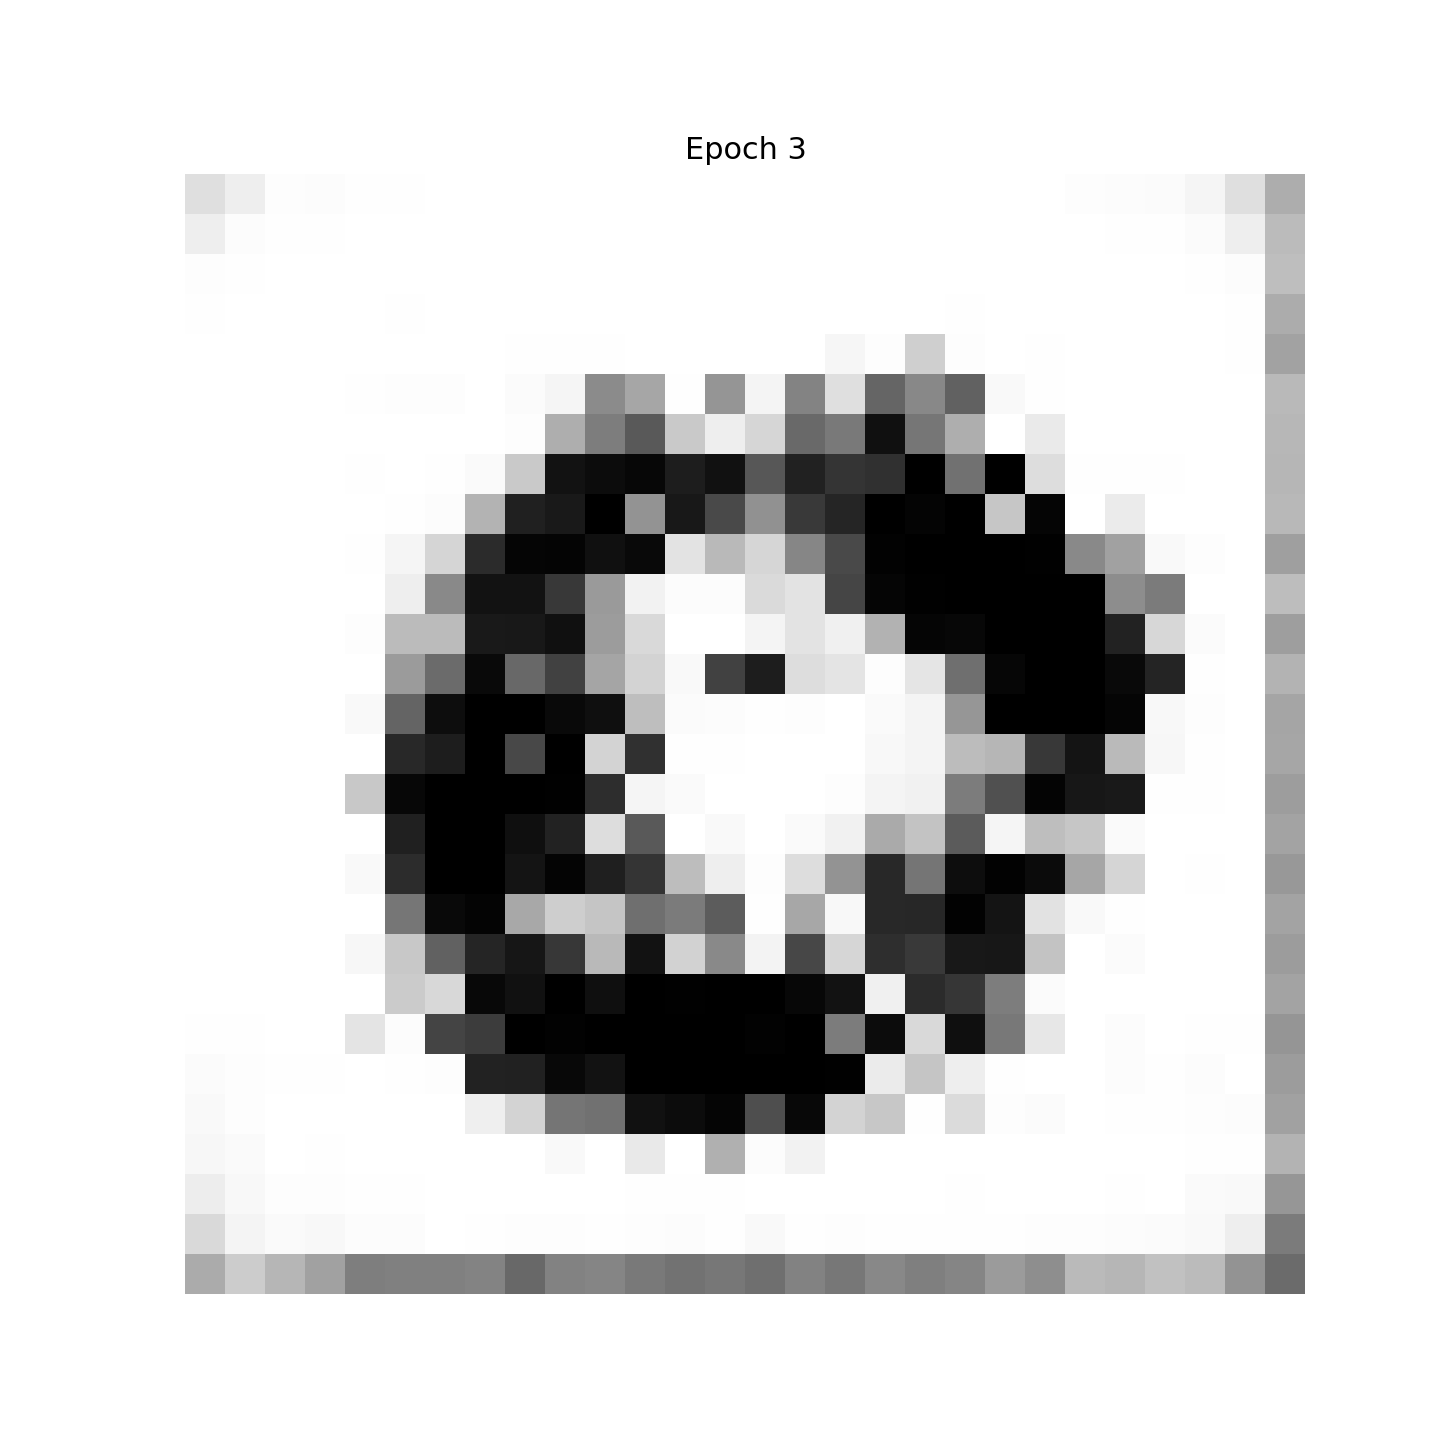

1/1 [==============================] - 0s 47ms/step


<IPython.core.display.Javascript object>


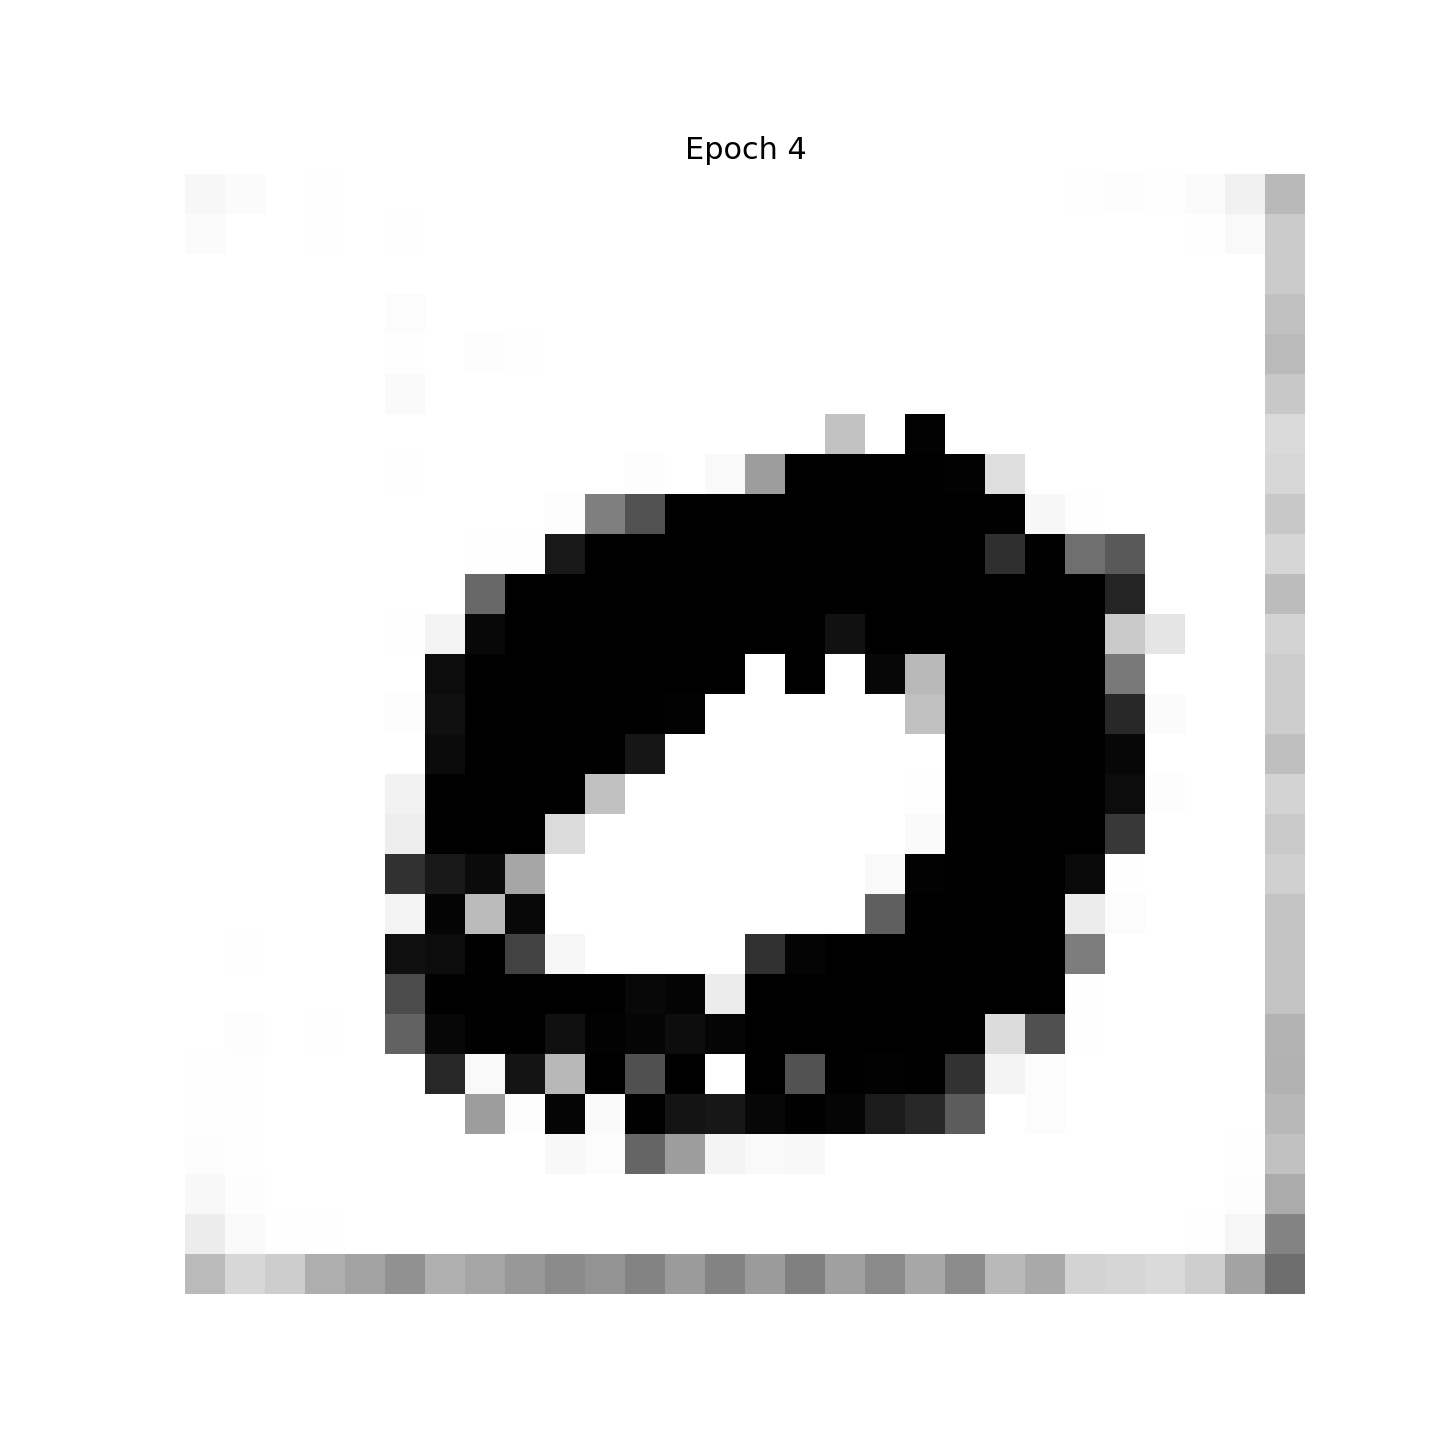

1/1 [==============================] - 0s 30ms/step


<IPython.core.display.Javascript object>


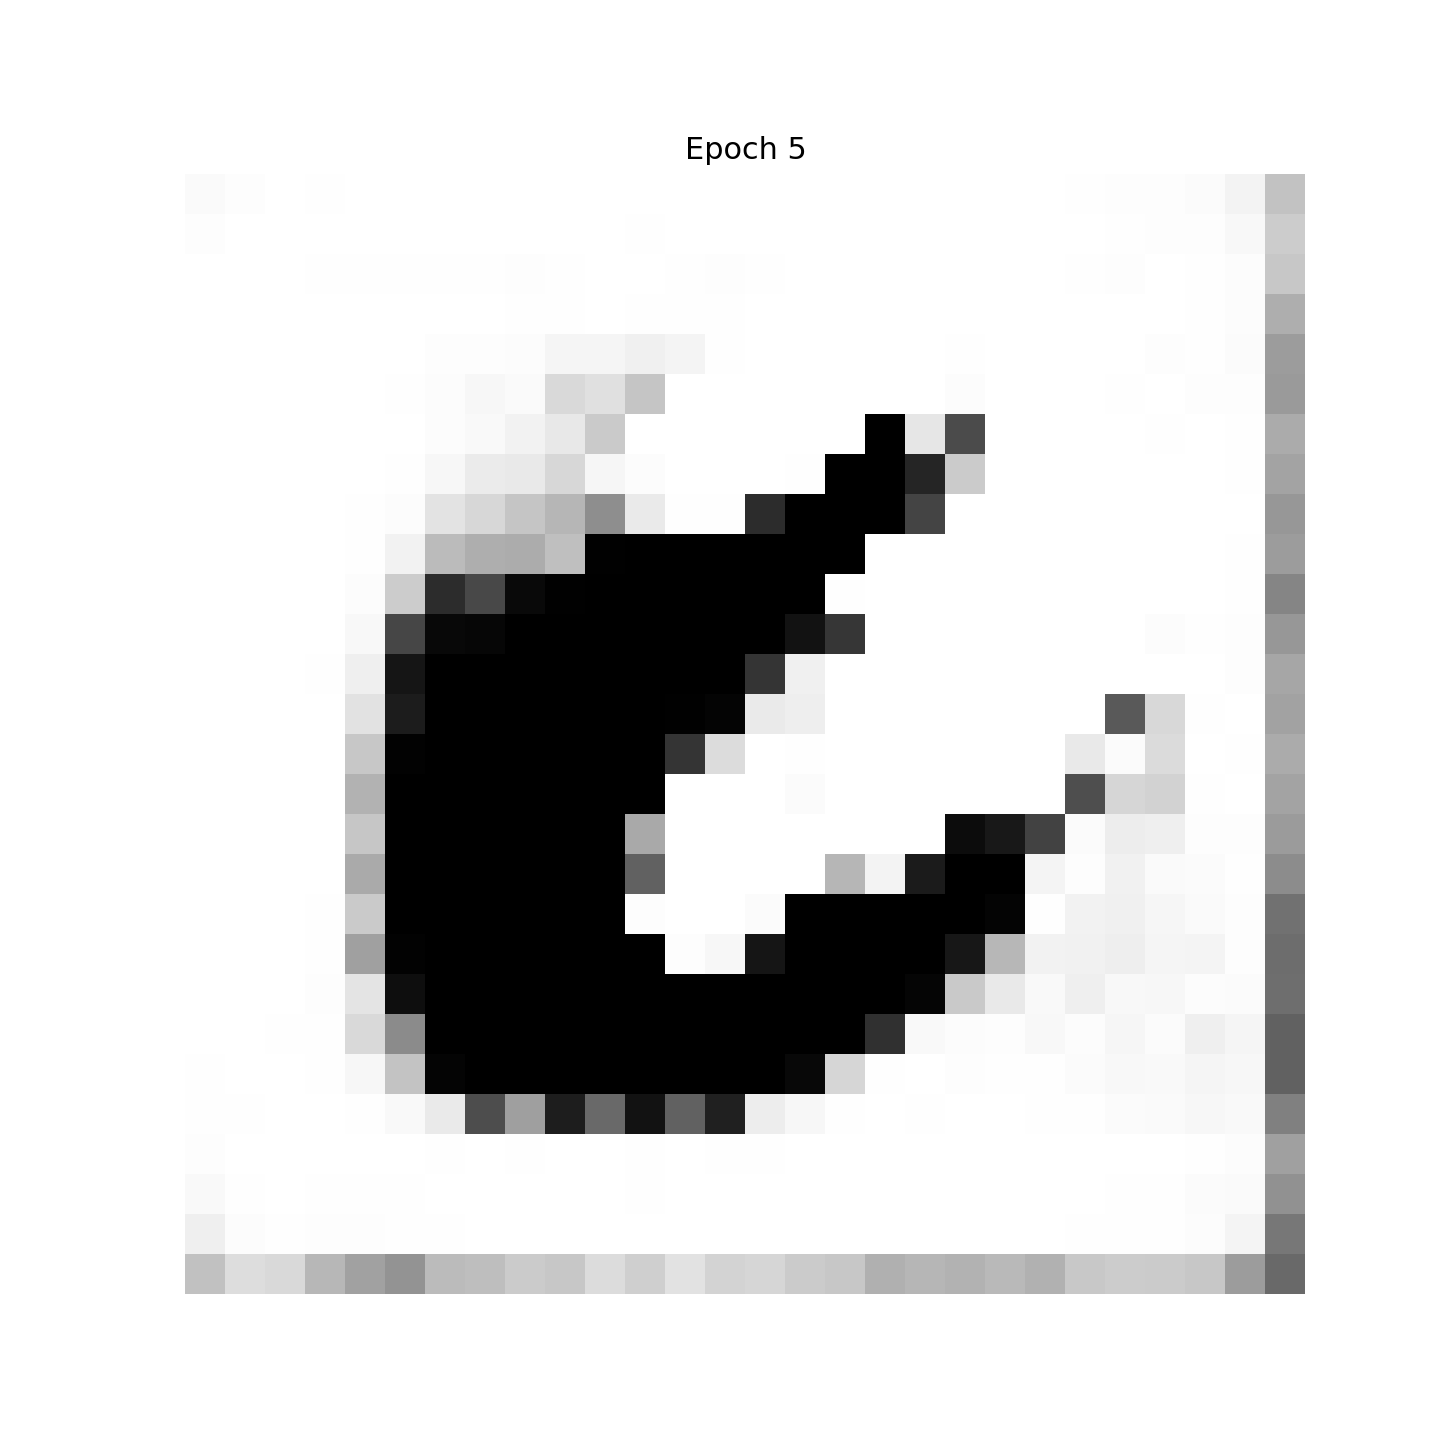

1/1 [==============================] - 0s 33ms/step


<IPython.core.display.Javascript object>


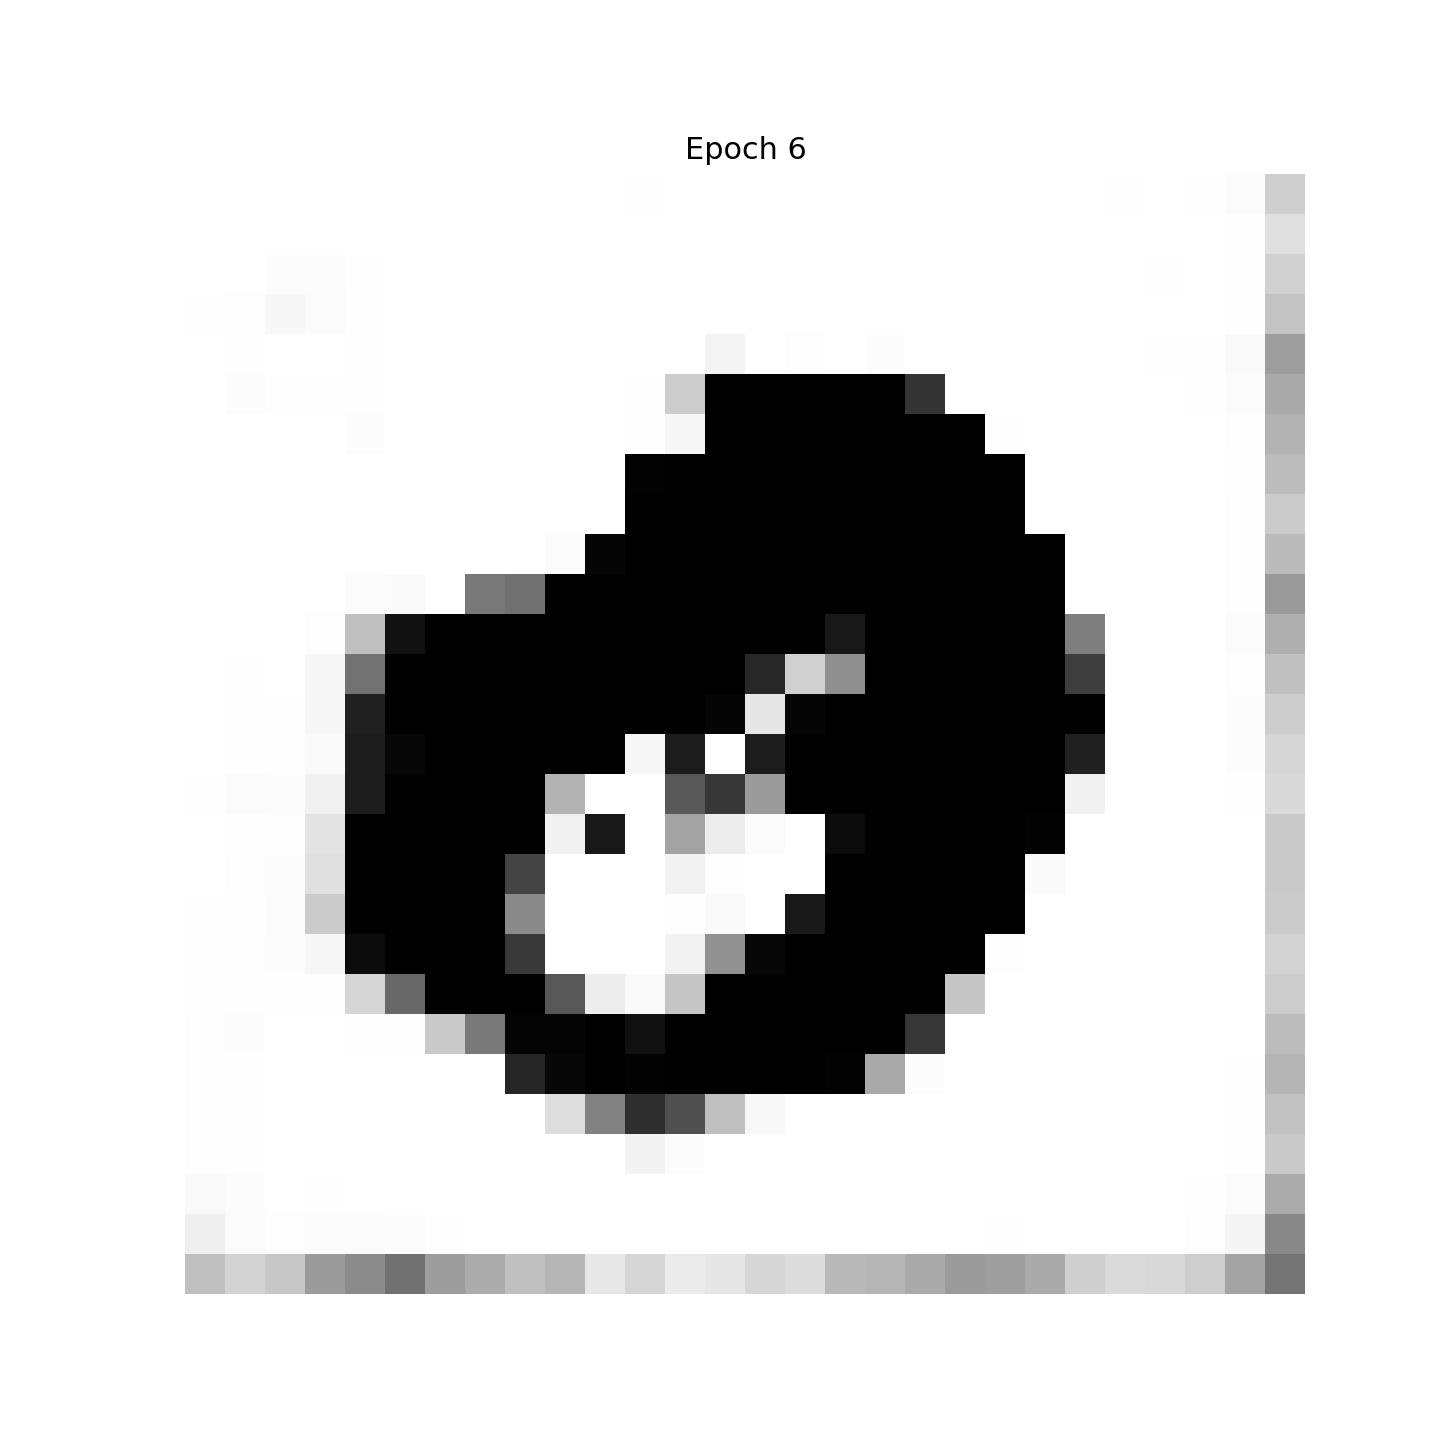

1/1 [==============================] - 0s 21ms/step


<IPython.core.display.Javascript object>


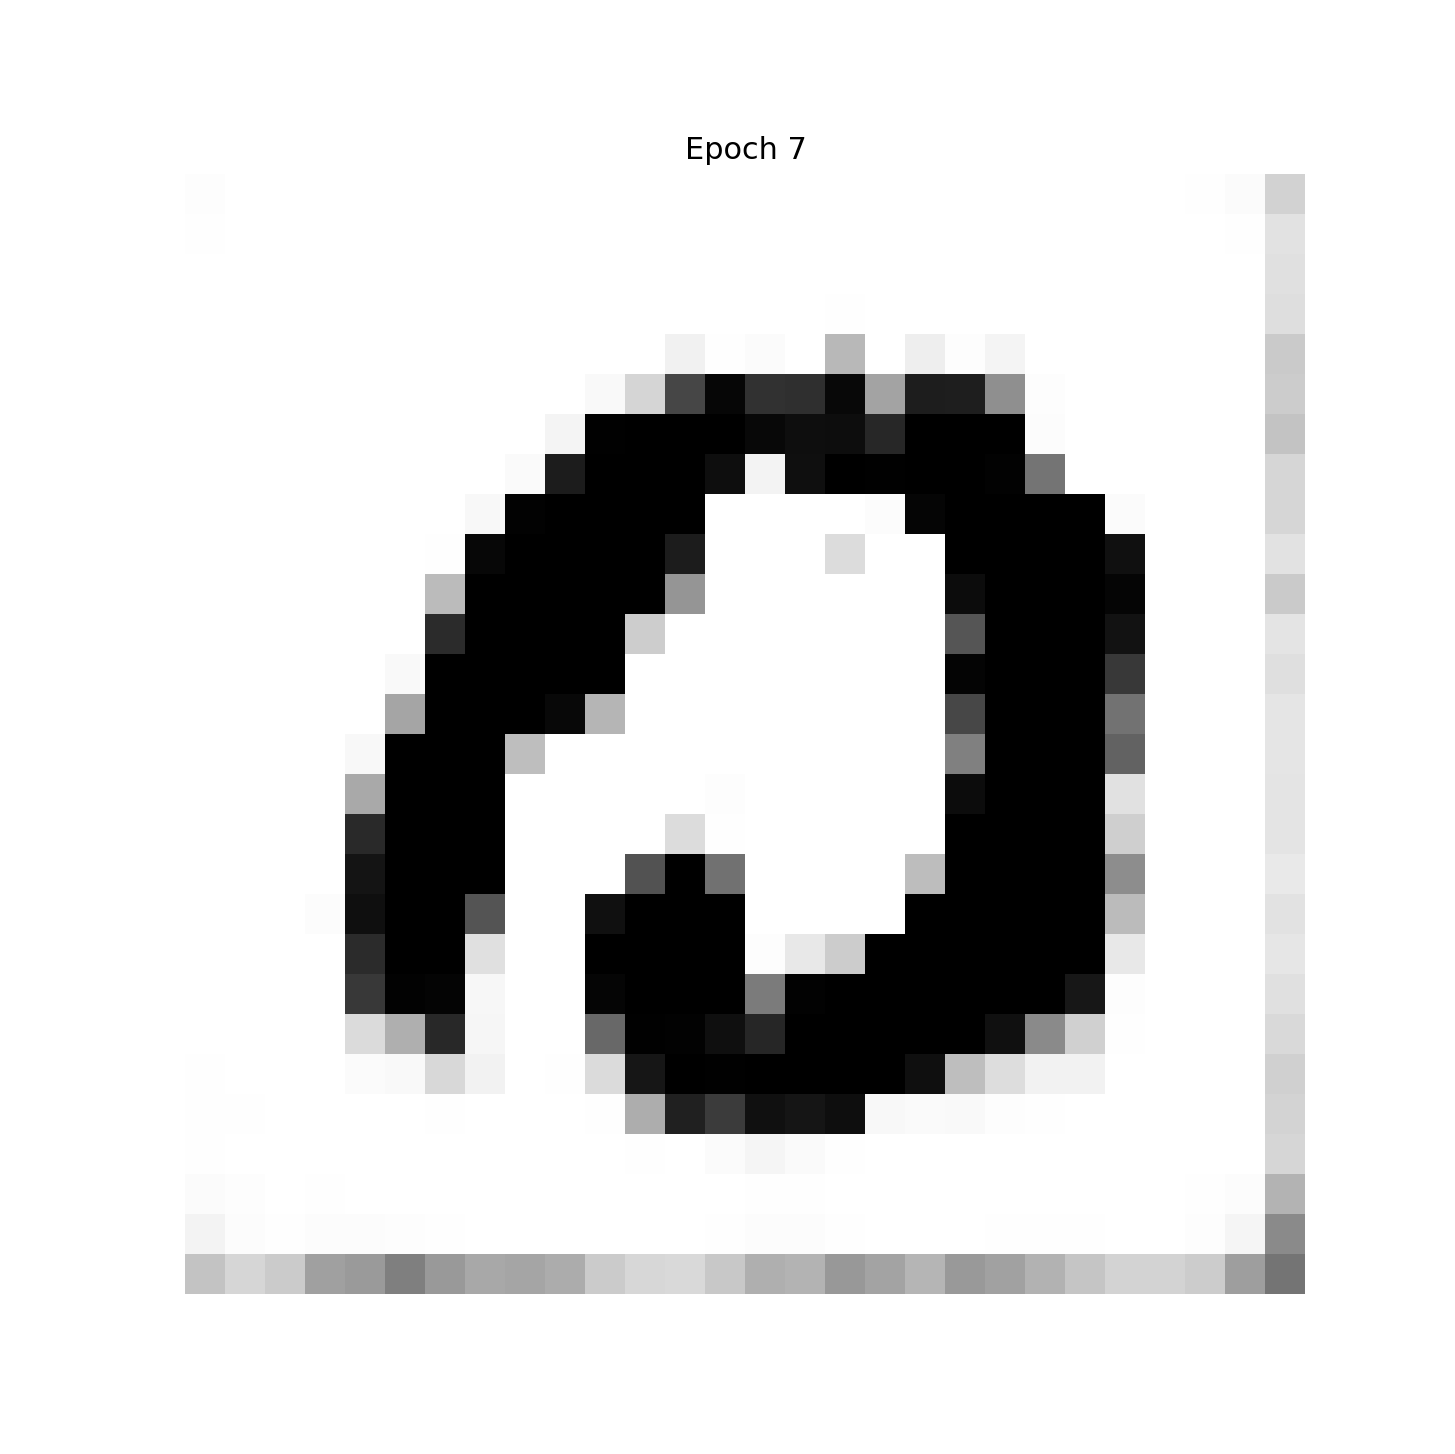

1/1 [==============================] - 0s 41ms/step


<IPython.core.display.Javascript object>


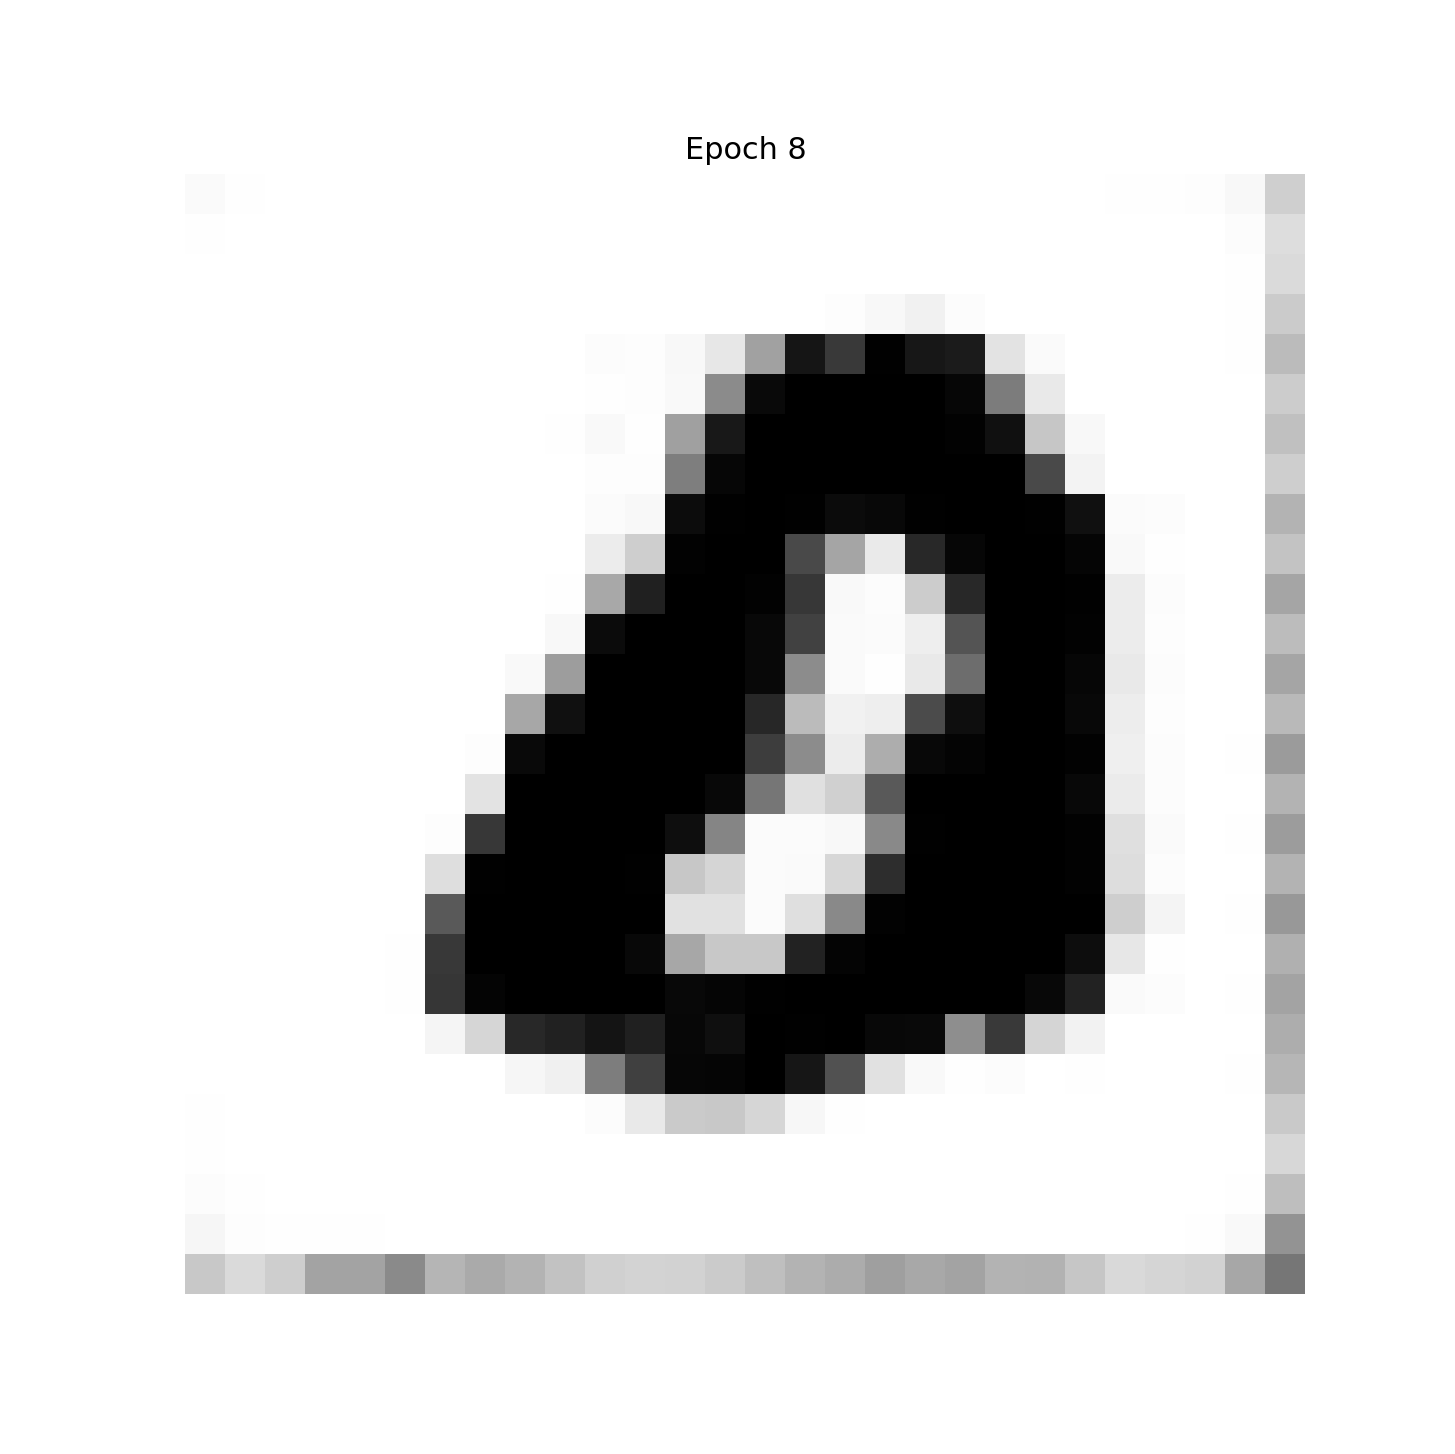

1/1 [==============================] - 0s 24ms/step


<IPython.core.display.Javascript object>


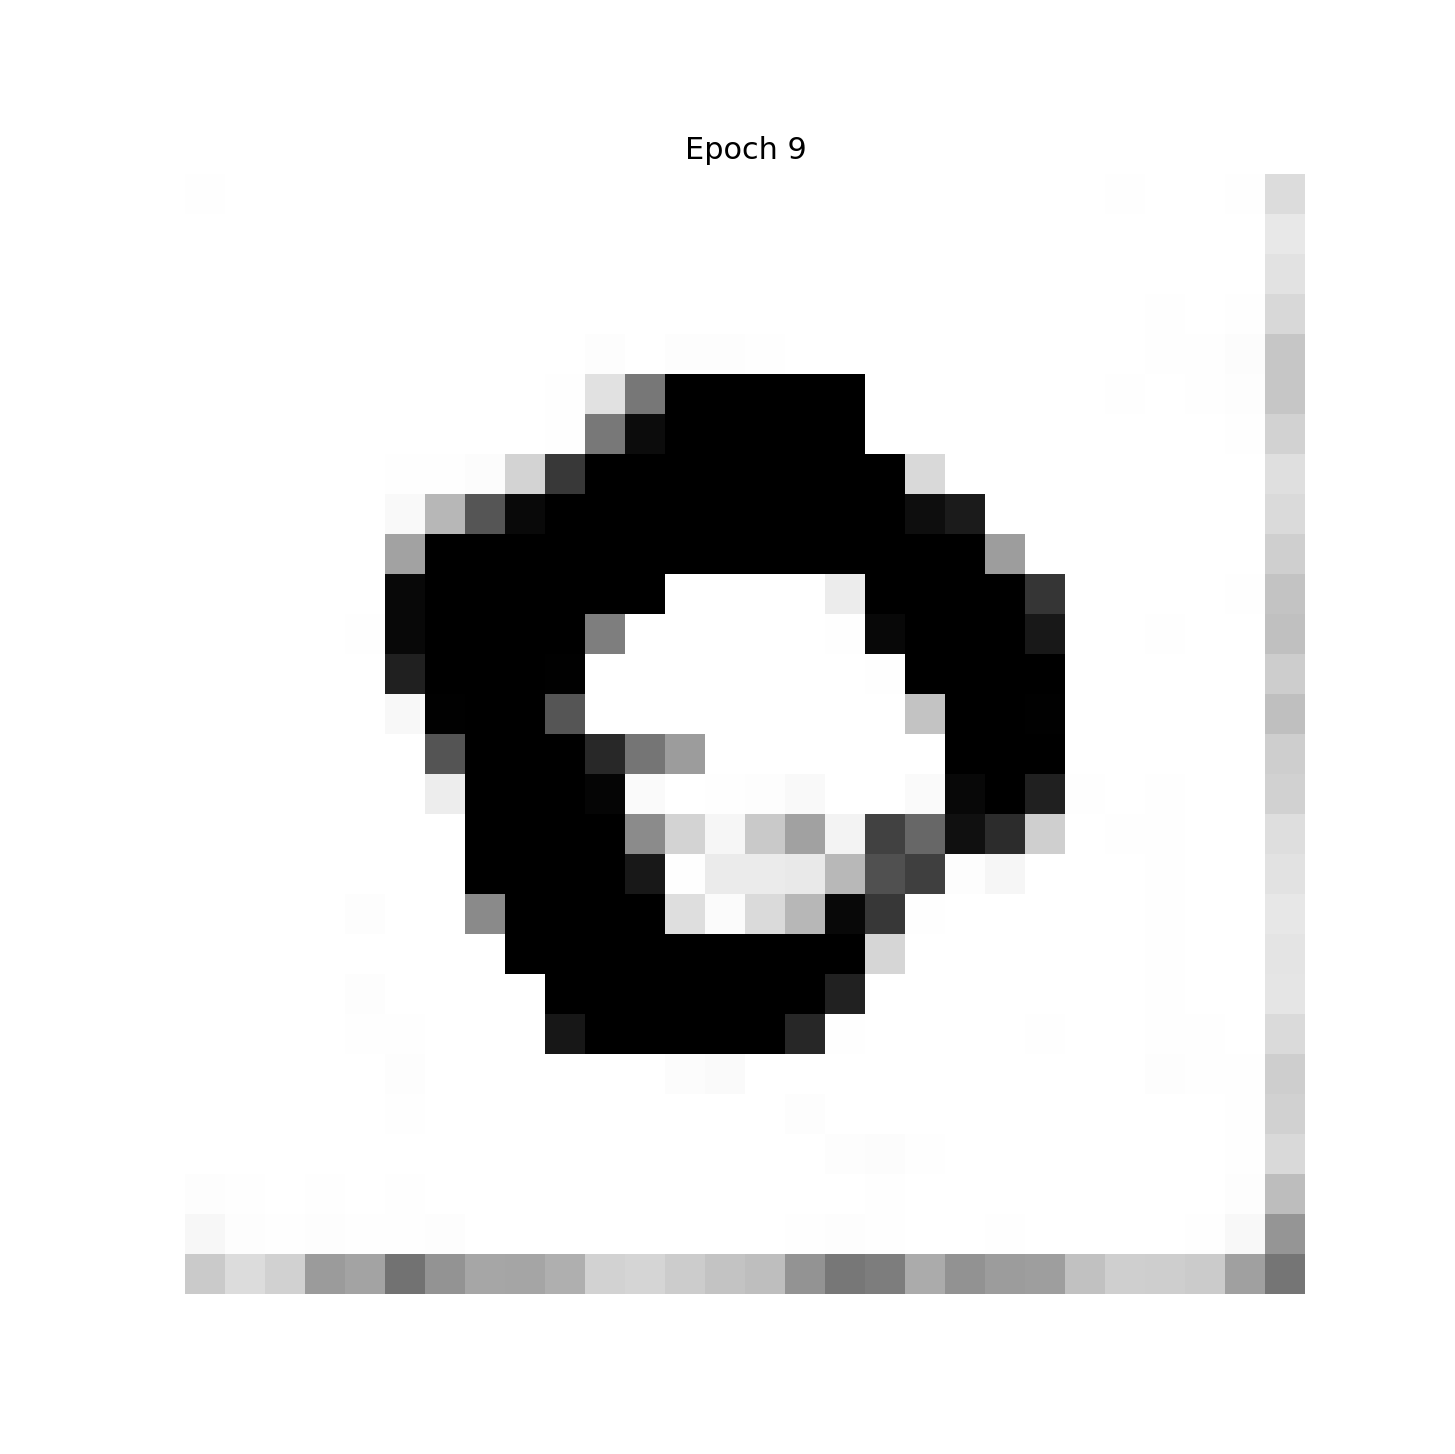

1/1 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>


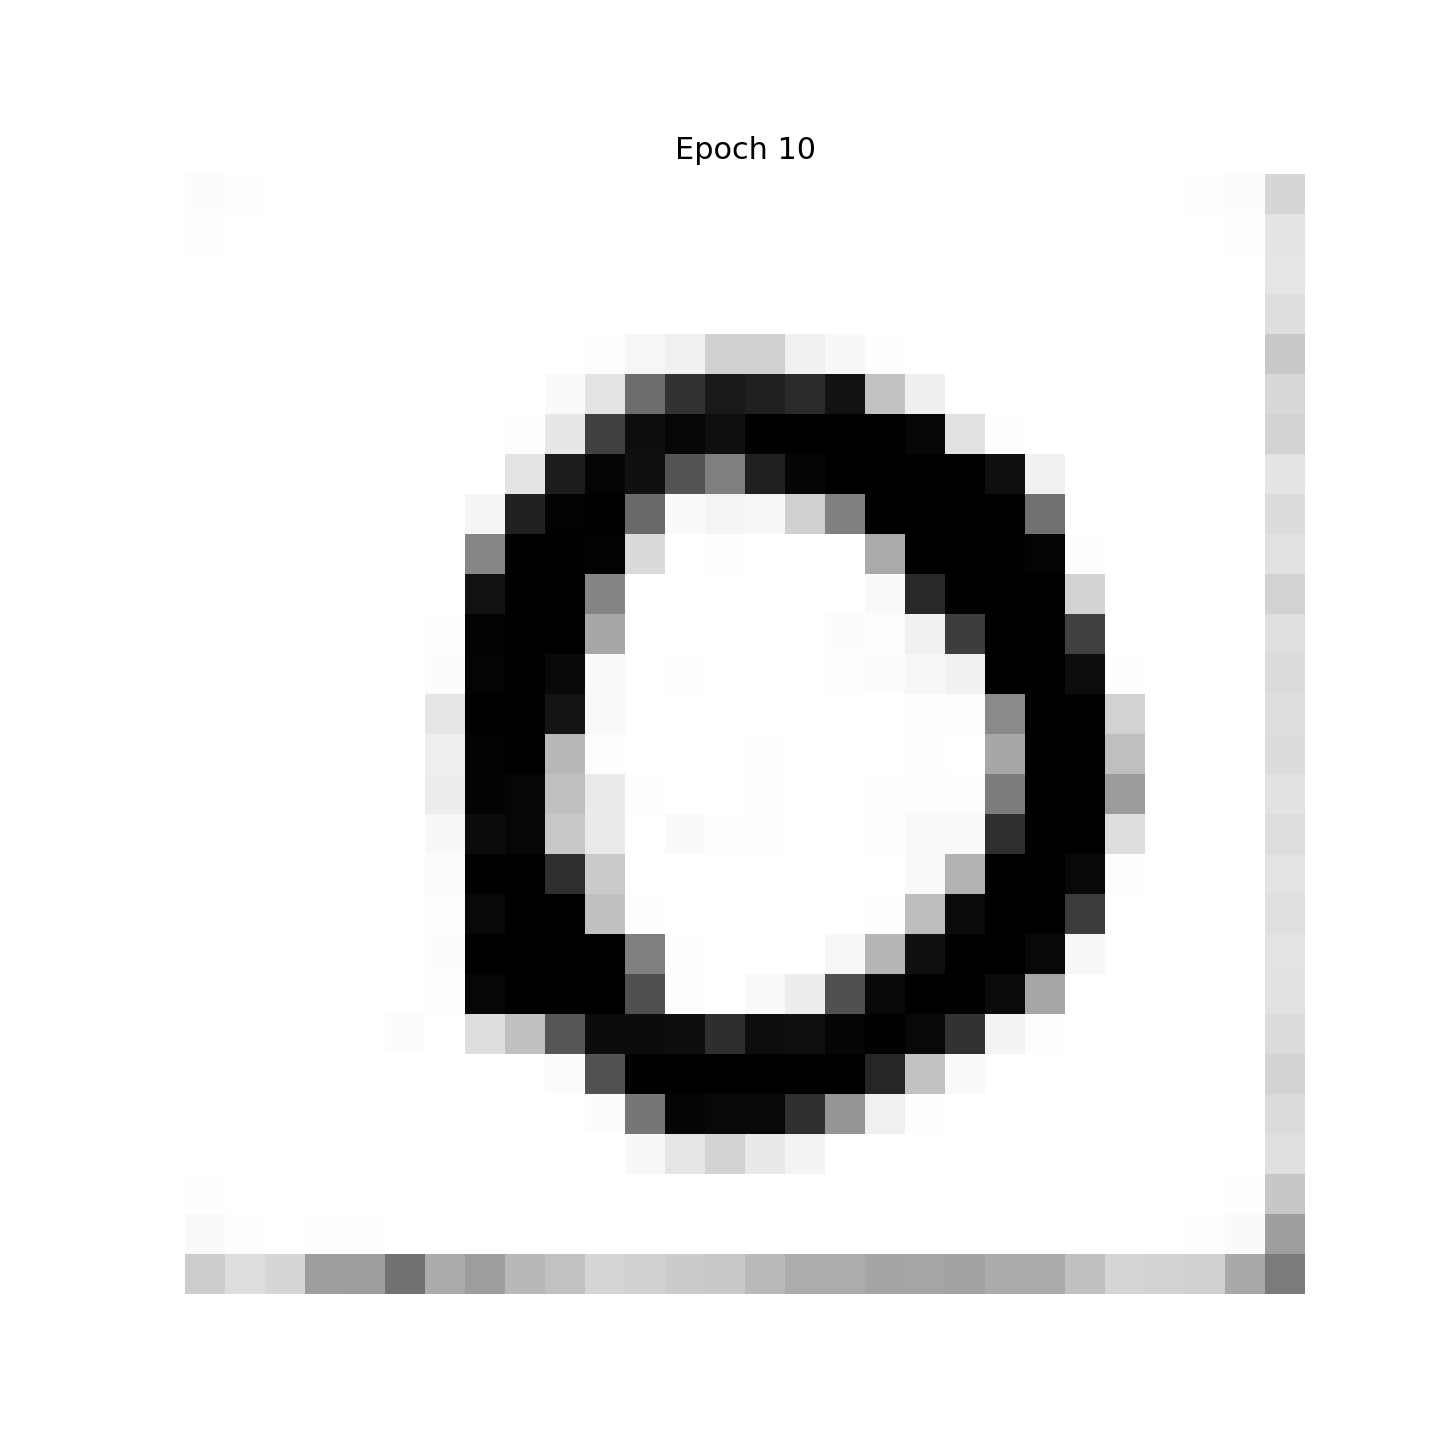

1/1 [==============================] - 0s 26ms/step


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 31ms/step


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 26ms/step


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 47ms/step


C:\Users\vshar\AppData\Local\Temp\ipykernel_37612\1587898577.py:124: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 8))


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 9ms/step


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>


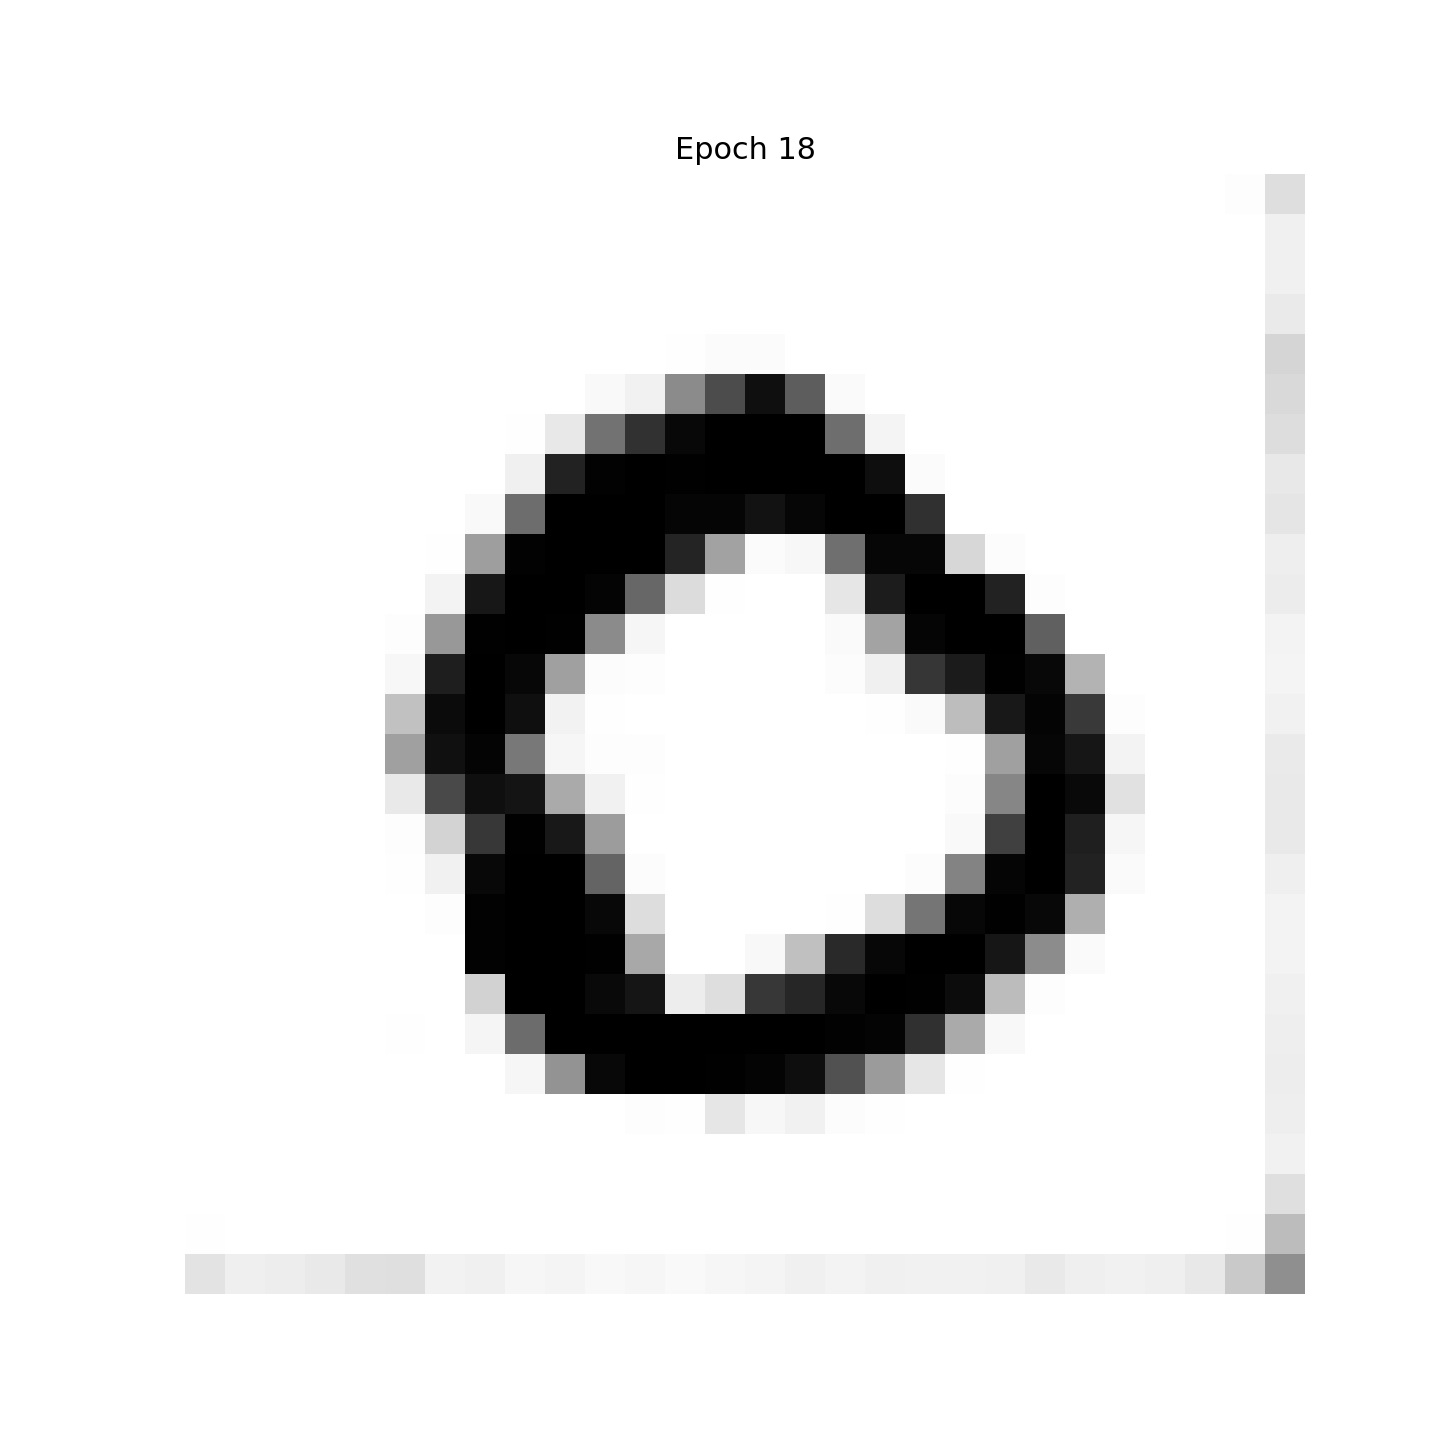

1/1 [==============================] - 0s 26ms/step


<IPython.core.display.Javascript object>


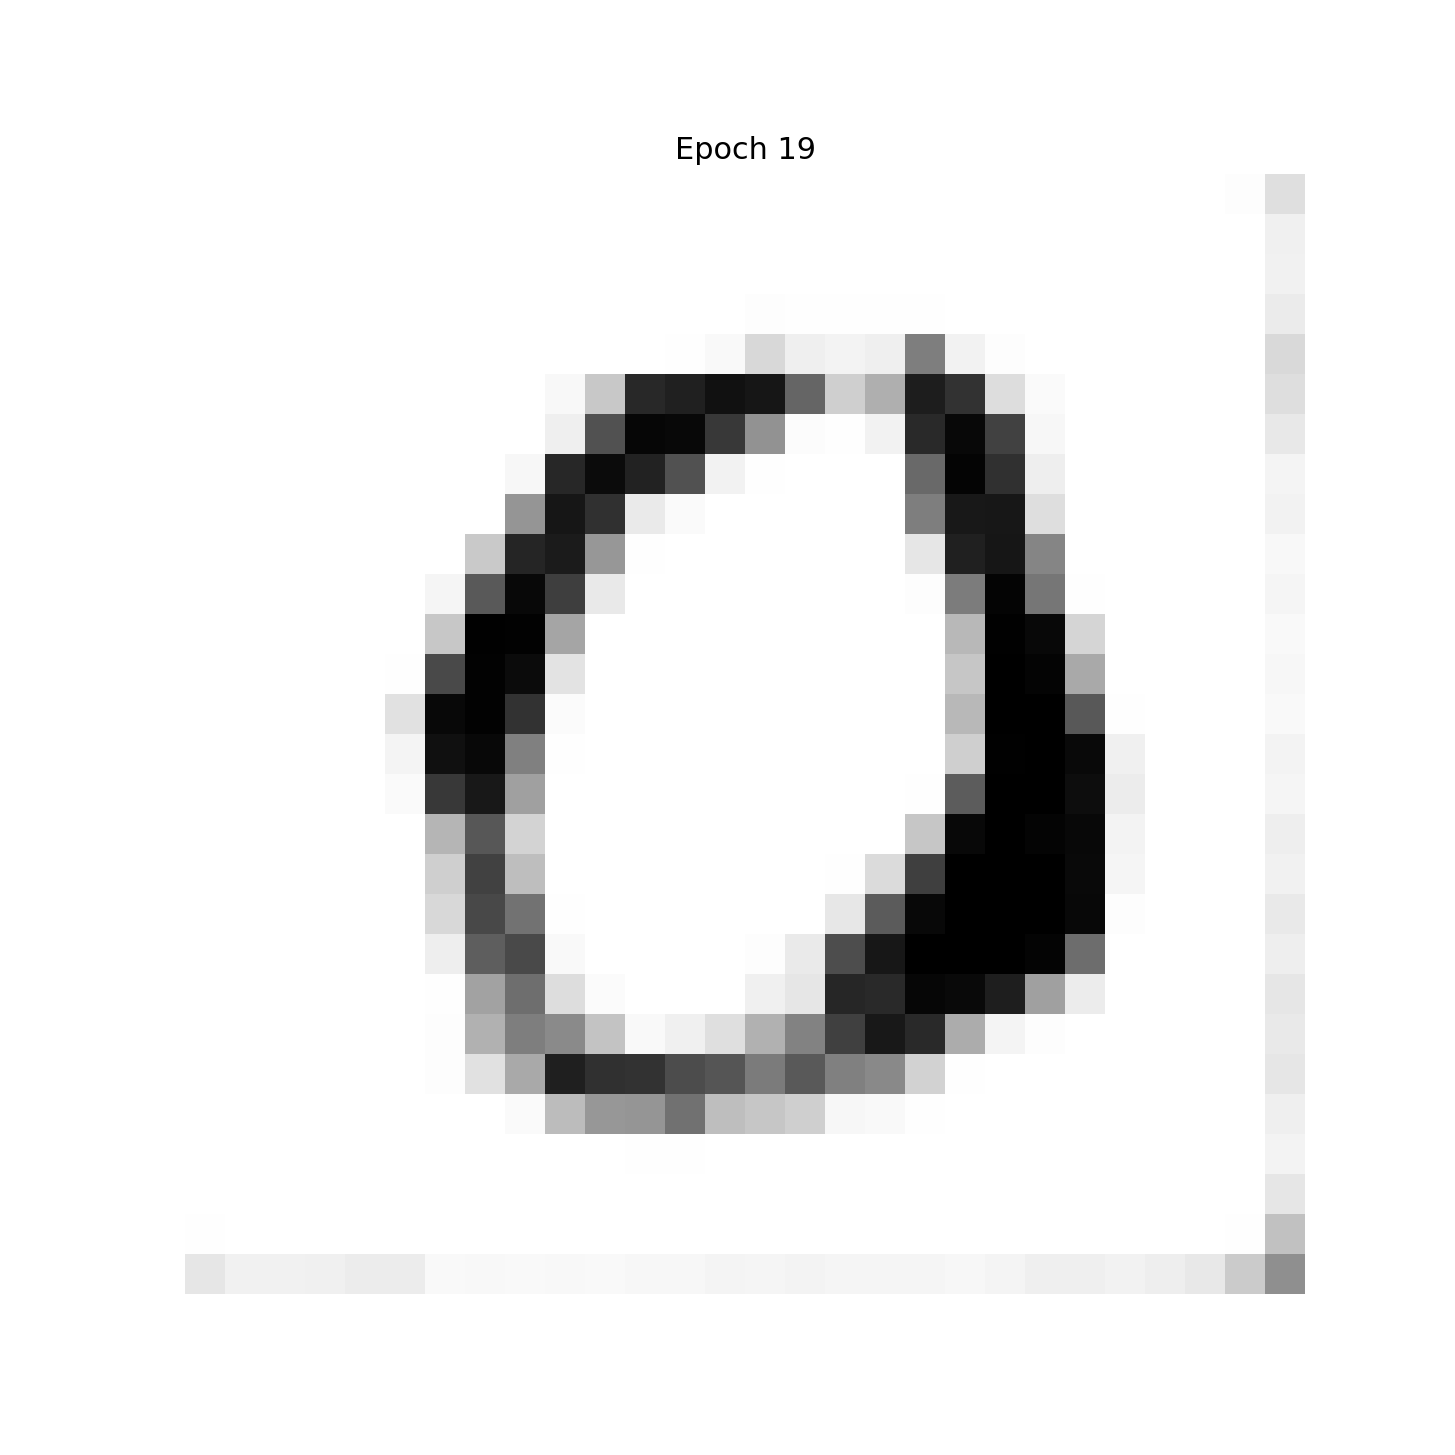

1/1 [==============================] - 0s 19ms/step


<IPython.core.display.Javascript object>


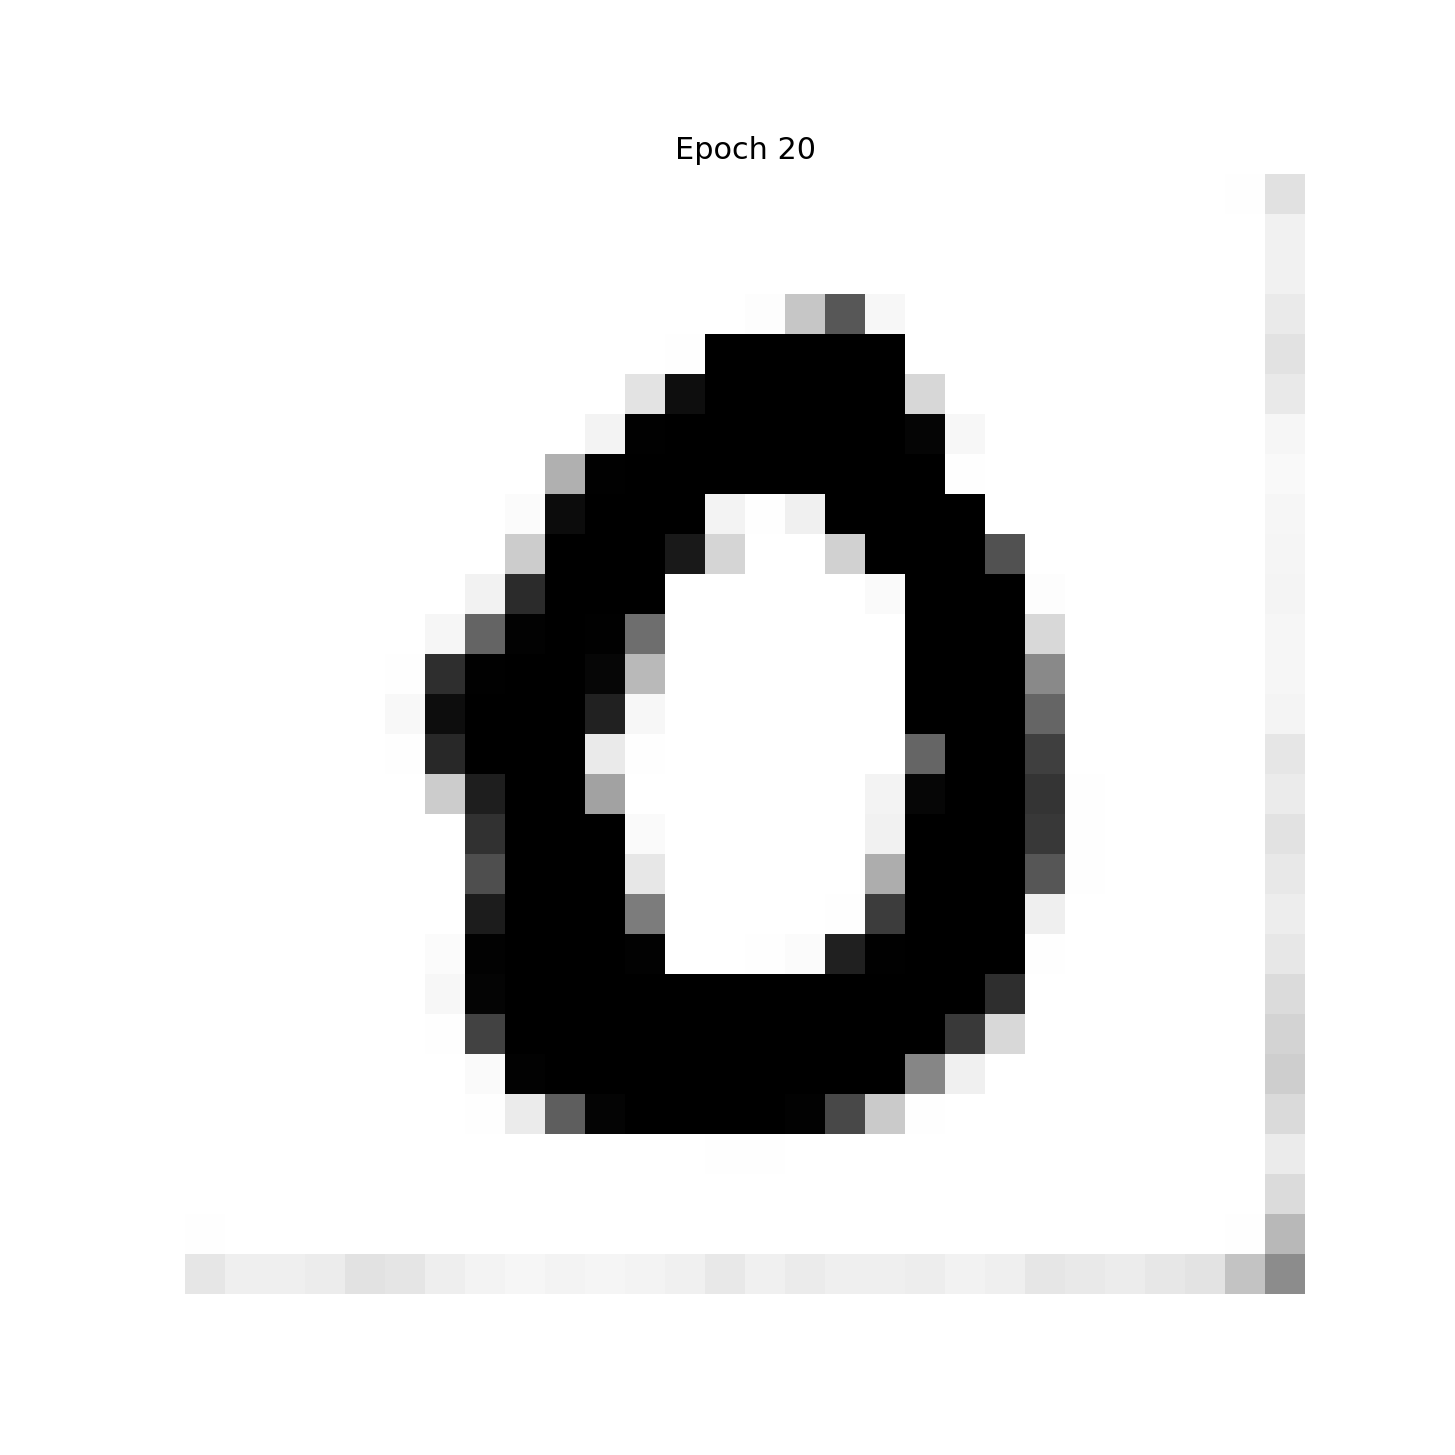

1/1 [==============================] - 0s 16ms/step


<IPython.core.display.Javascript object>


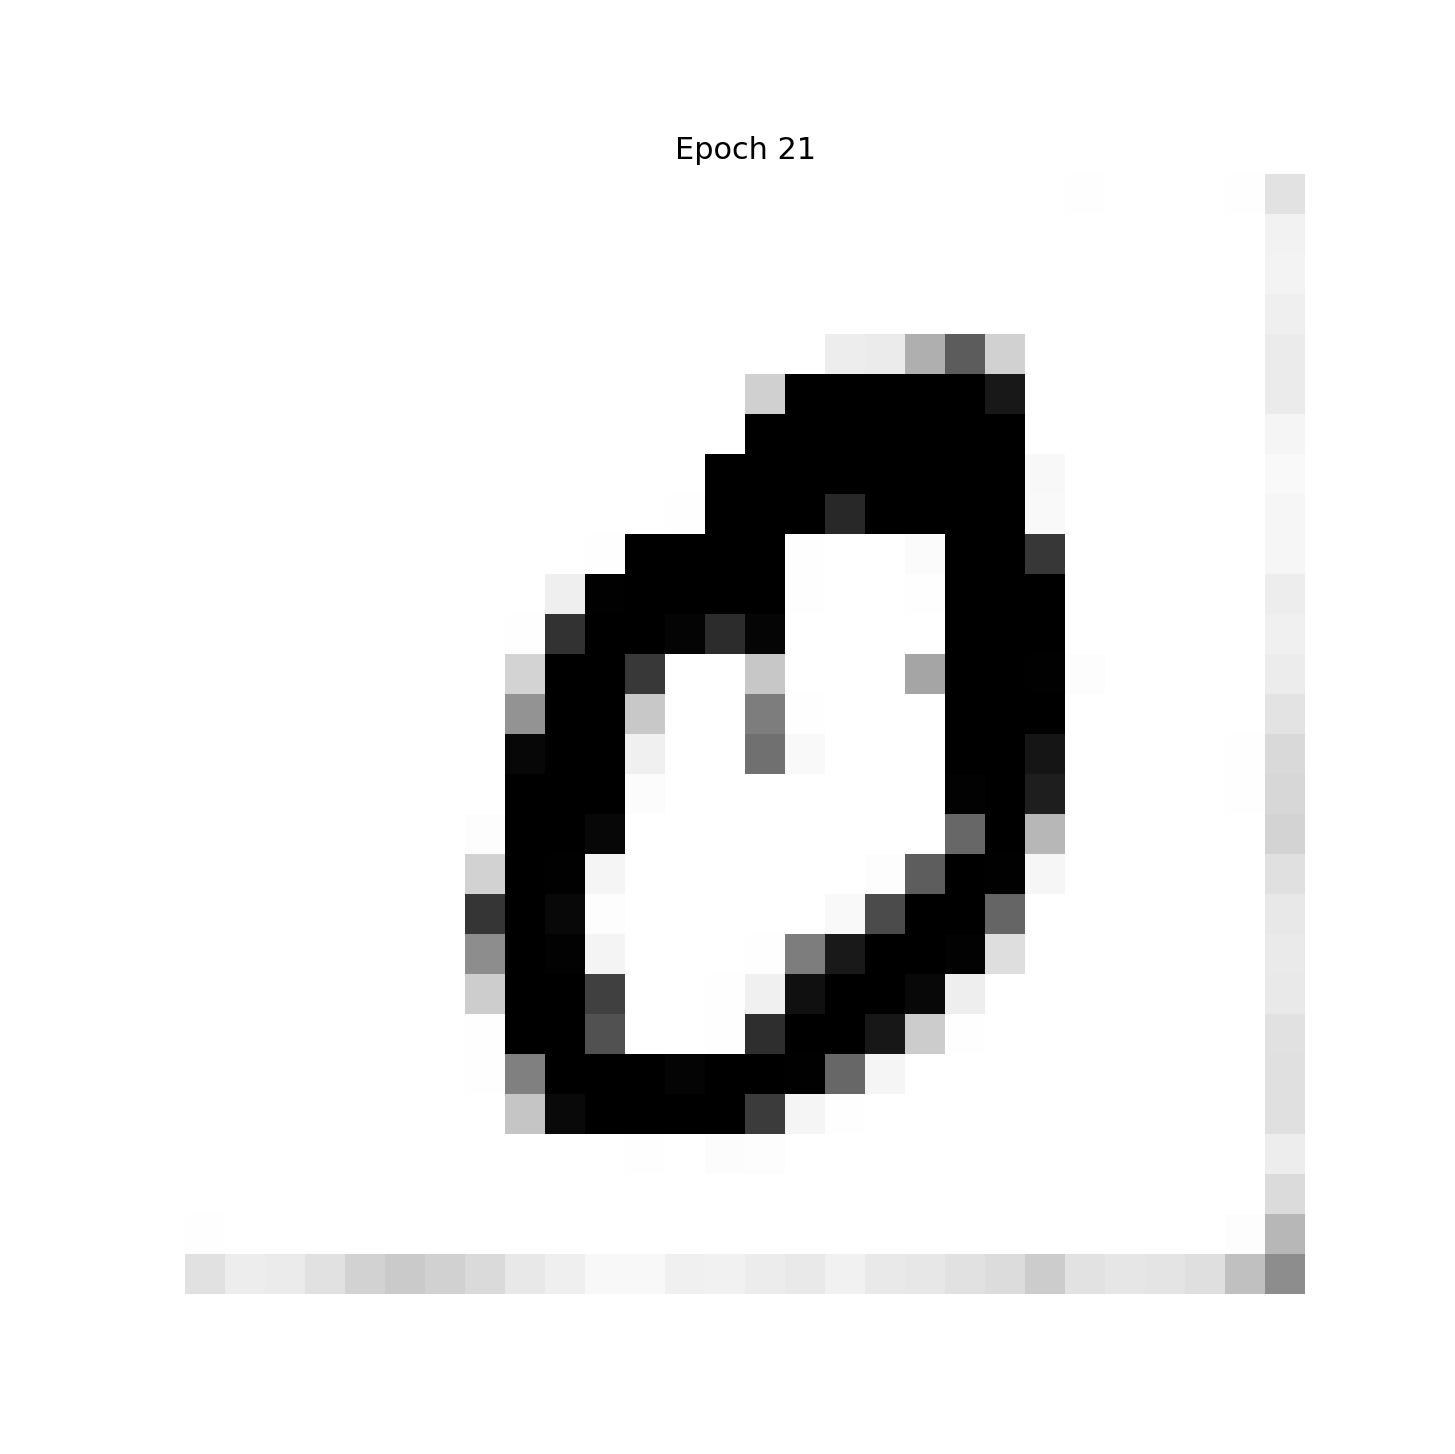

1/1 [==============================] - 0s 31ms/step


<IPython.core.display.Javascript object>


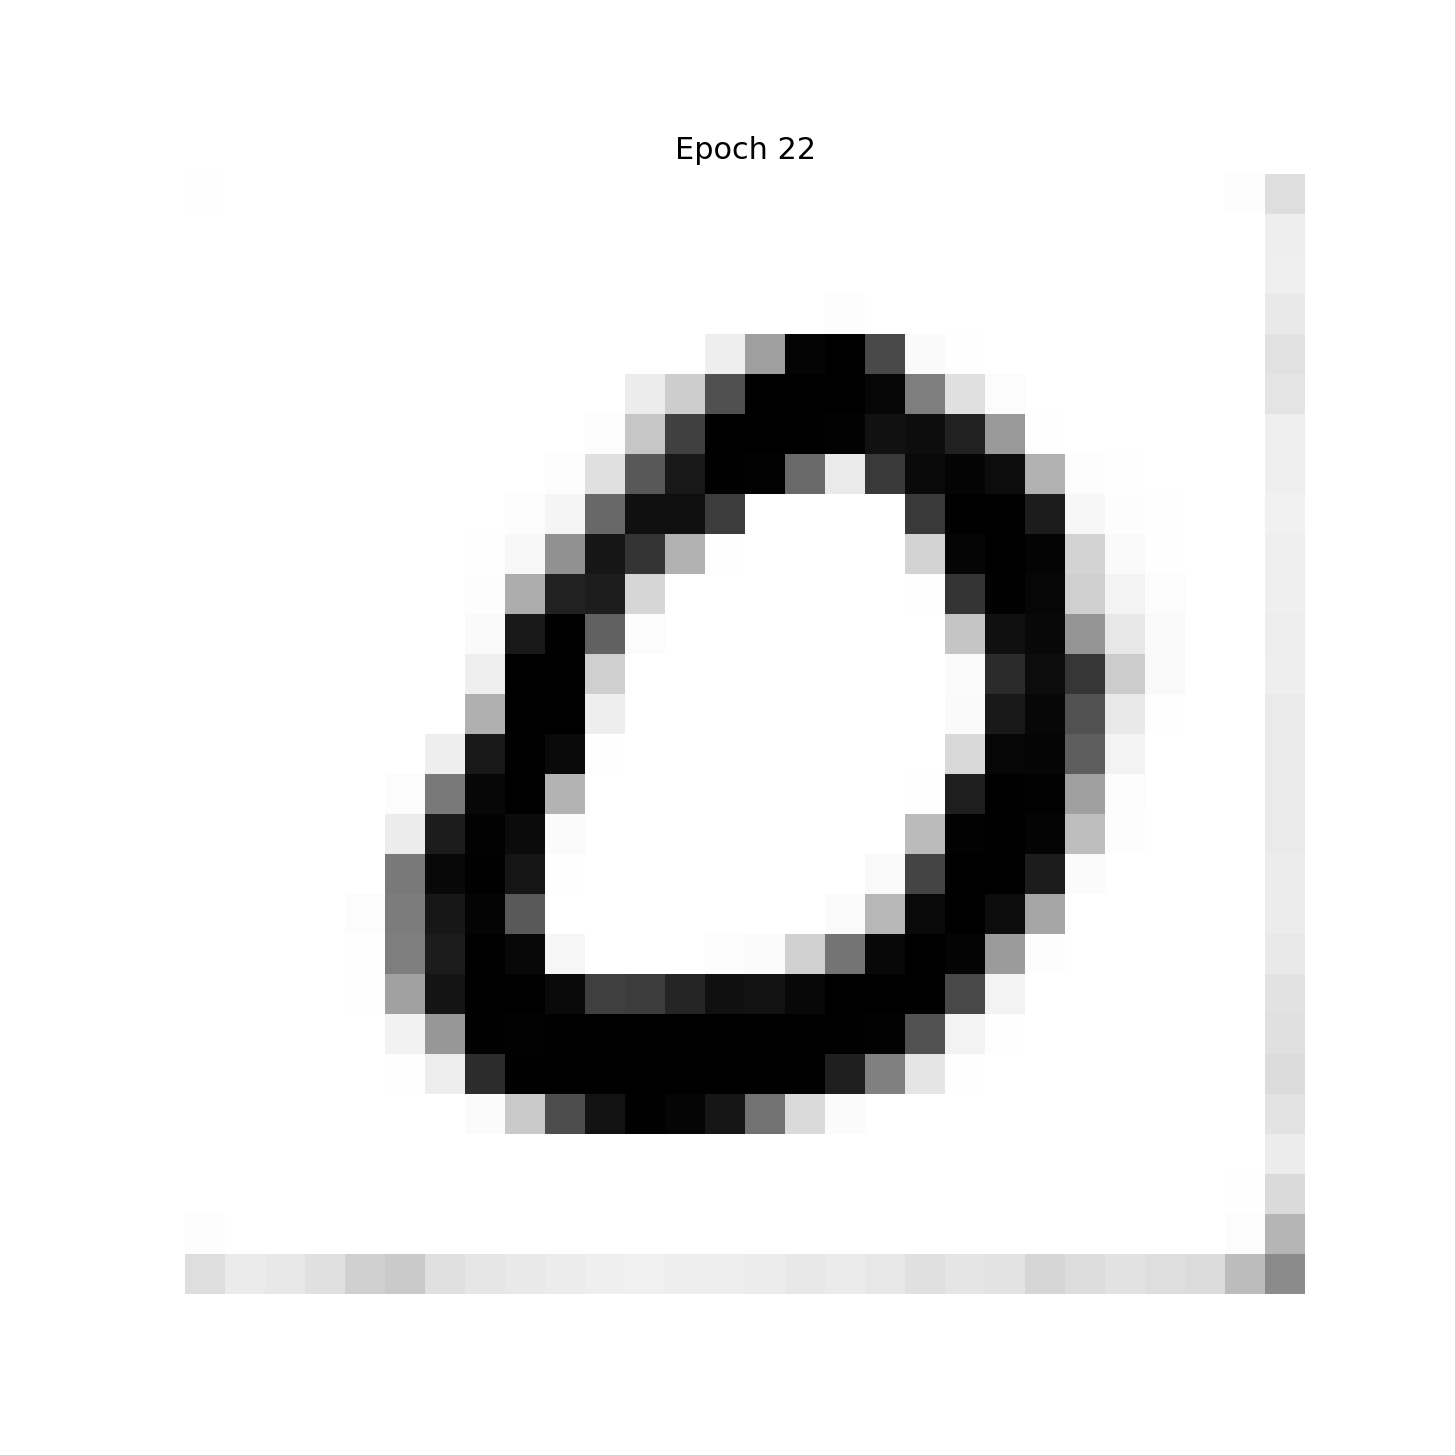

1/1 [==============================] - 0s 63ms/step


<IPython.core.display.Javascript object>


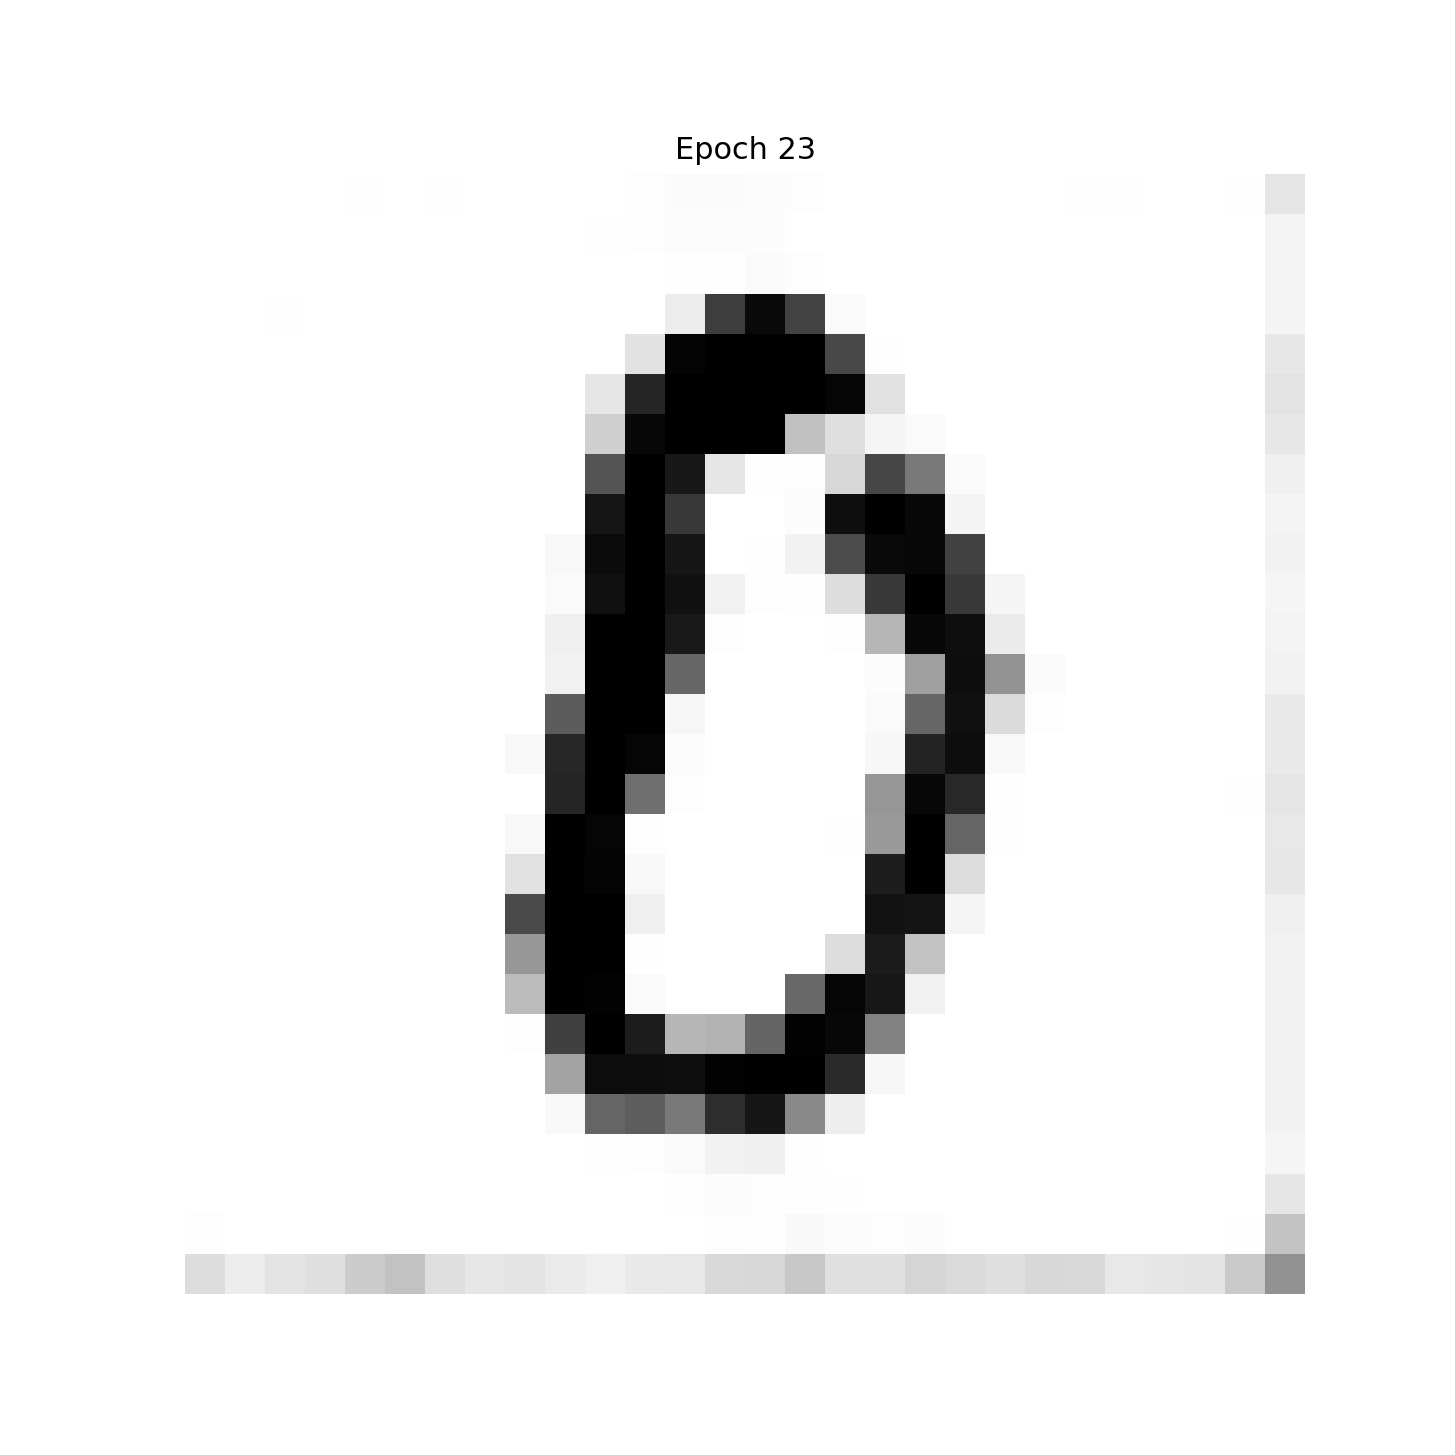

1/1 [==============================] - 0s 31ms/step


<IPython.core.display.Javascript object>


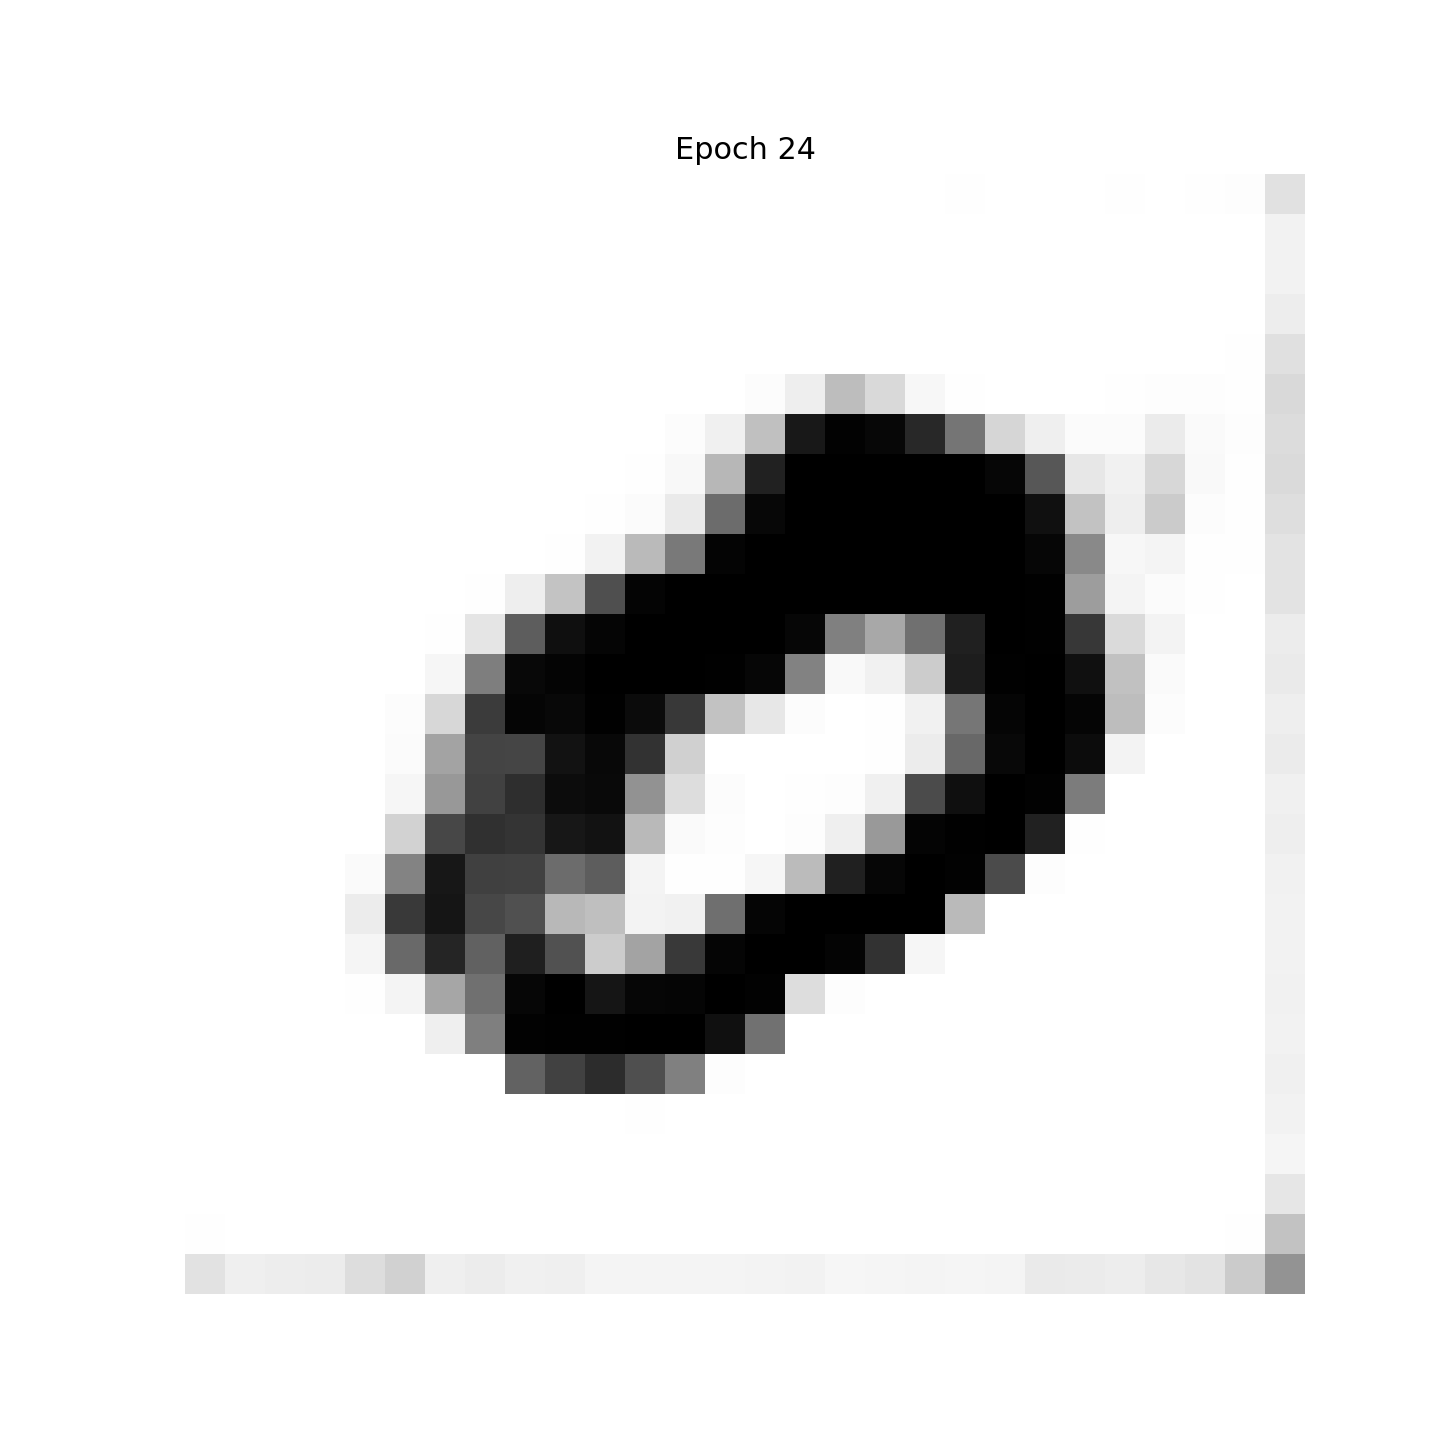

1/1 [==============================] - 0s 15ms/step


<IPython.core.display.Javascript object>


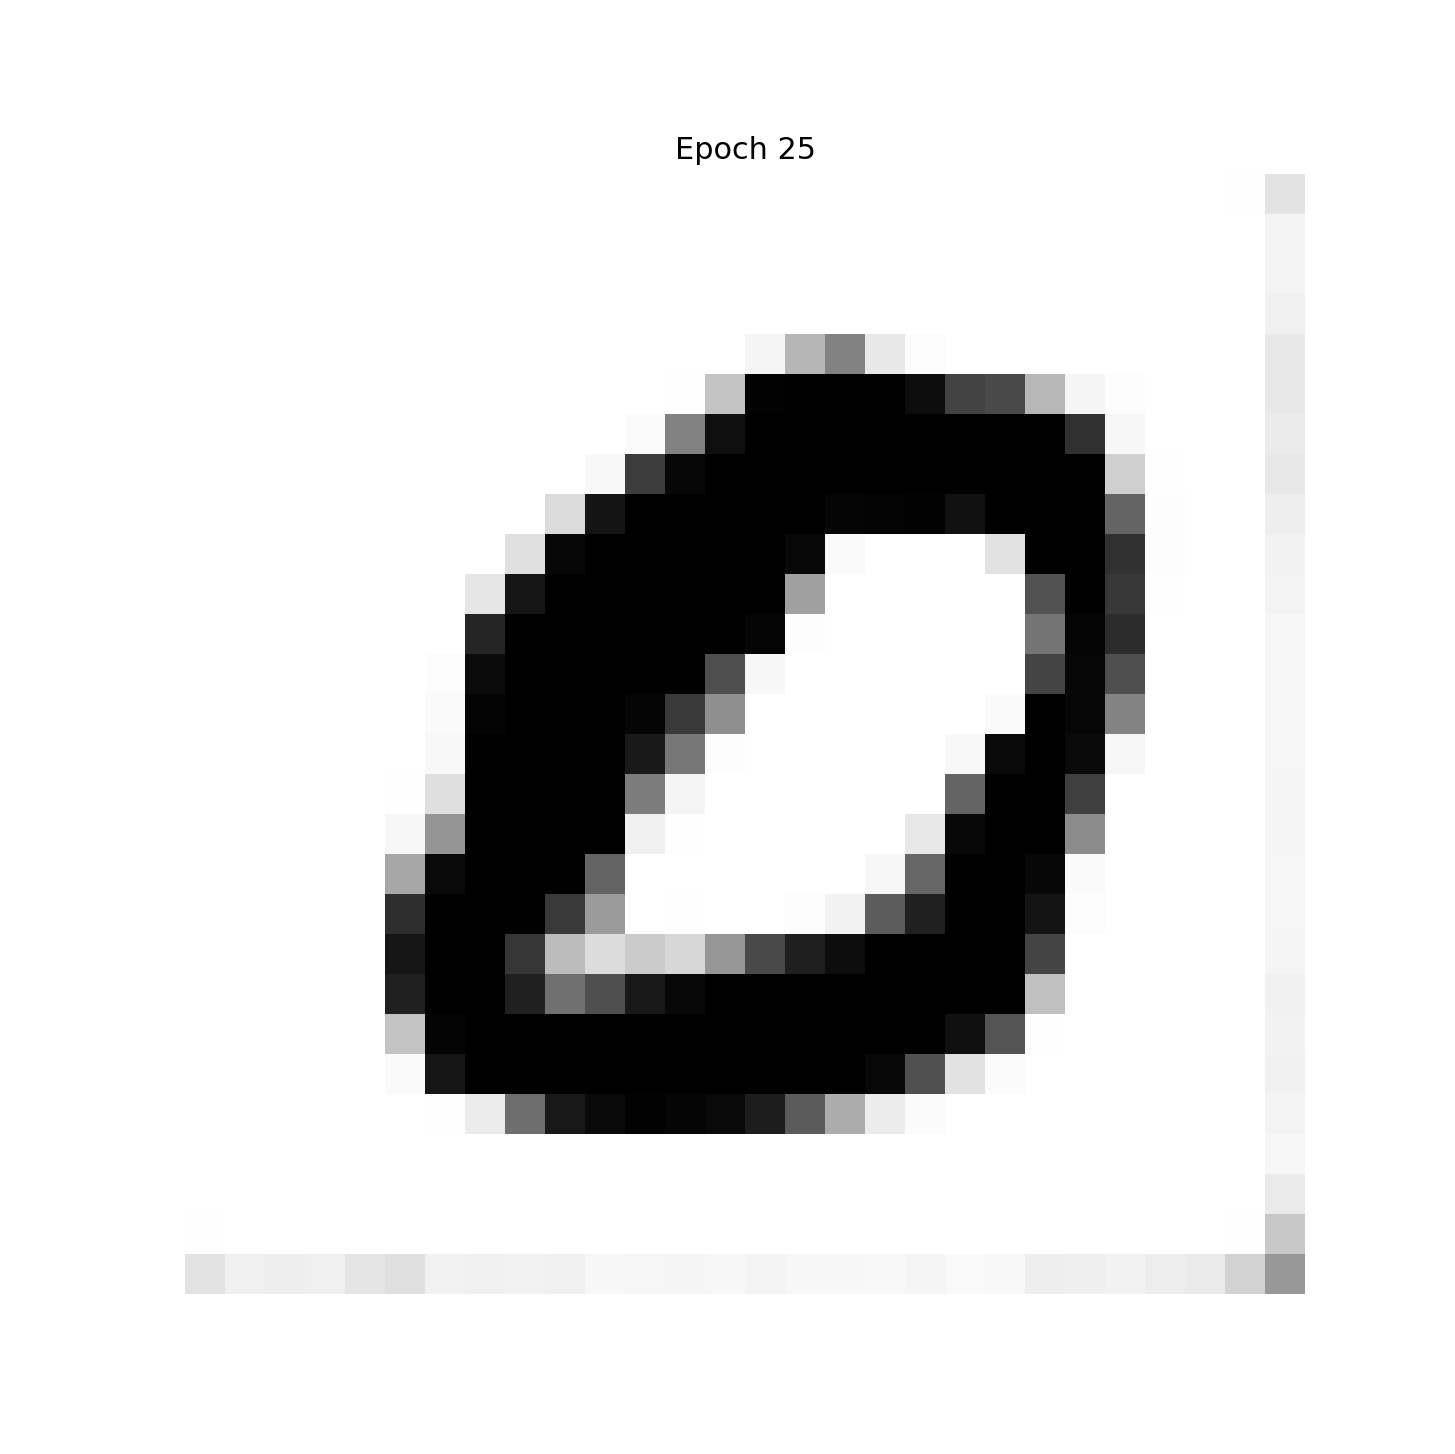

In [47]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.layers import Dense, Flatten, Conv2D, BatchNormalization, Conv2DTranspose, Reshape, LeakyReLU, Input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
from PIL import Image
from matplotlib import pyplot as plt

# Set TensorFlow to only use GPU memory as needed
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    tf.config.experimental.set_memory_growth(gpus[0], True)

print('TensorFlow version:', tf.__version__)

# Task 2: Importing and Plotting the Data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[y_train == 0]  # Select only the digit '0' images
x_test = x_test[y_test == 0]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x = np.concatenate([x_train, x_test], axis=0)

# Function to plot random examples
def plot_ten_random_examples(plt, x):
    indices = np.random.randint(0, x.shape[0], 10)
    plt.figure(figsize=(8, 8))
    for i, index in enumerate(indices):
        plt.subplot(10, 10, i + 1)
        plt.imshow(x[index], cmap='binary')
        plt.axis('off')
    return plt

plot_ten_random_examples(plt, x)
plt.show()

# Discriminator
discriminator = Sequential([
    Conv2D(64, 3, strides=2, input_shape=(28, 28, 1)),
    LeakyReLU(),
    BatchNormalization(),
    Conv2D(128, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),
    Conv2D(256, 5, strides=2),
    LeakyReLU(),
    BatchNormalization(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.legacy.Adam(learning_rate=2e-4, beta_1=0.5)
discriminator.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
discriminator.summary()

# Generator
generator = Sequential([
    Dense(256, activation='relu', input_shape=(1,)),
    Reshape((1, 1, 256)),
    Conv2DTranspose(256, 5, activation='relu'),
    BatchNormalization(),
    Conv2DTranspose(128, 5, activation='relu'),
    BatchNormalization(),
    Conv2DTranspose(64, 5, strides=2, activation='relu'),
    BatchNormalization(),
    Conv2DTranspose(32, 5, activation='relu'),
    BatchNormalization(),
    Conv2DTranspose(1, 4, activation='sigmoid')
])

generator.summary()

size = 28
noise_dim = 1
noise = np.random.randn(1, noise_dim)
gen_image = generator.predict(noise)[0]

plt.figure()
plt.imshow(np.reshape(gen_image, (28, 28)), cmap='binary')

# Task 5: Generative Adversarial Network (GAN)
input_layer = Input(shape=(noise_dim,))
gen_out = generator(input_layer)
disc_out = discriminator(gen_out)
gan = Model(input_layer, disc_out)
discriminator.trainable = False
gan.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
gan.summary()

# Training loop
epochs = 25
batch_size = 128
steps_per_epoch = int(2 * x.shape[0] / batch_size)
print('Steps per epoch=', steps_per_epoch)

for e in range(0, epochs):
    for step in range(0, steps_per_epoch):
        true_examples = x[int(batch_size/2) * step: int(batch_size/2) * (step + 1)]
        true_examples = np.reshape(true_examples, (true_examples.shape[0], 28, 28, 1))

        noise = np.random.randn(int(batch_size/2), noise_dim)
        generated_examples = generator.predict(noise)

        x_batch = np.concatenate([generated_examples, true_examples], axis=0)
        y_batch = np.array([0] * int(batch_size/2) + [1] * int(batch_size/2))

        indices = np.random.choice(range(batch_size), batch_size, replace=False)
        x_batch = x_batch[indices]
        y_batch = y_batch[indices]

        # Train the discriminator
        discriminator.trainable = True
        discriminator.train_on_batch(x_batch, y_batch)
        discriminator.trainable = False

        # Train the generator
        loss = gan.train_on_batch(noise, np.ones((int(batch_size/2), 1)))

    noise = np.random.randn(1, noise_dim)
    generated_example = generator.predict(noise)[0]

    plt.figure(figsize=(8, 8))
    plt.imshow(np.reshape(generated_example, (28, 28)), cmap='binary')
    plt.title(f'Epoch {e + 1}')
    plt.axis('off')
    plt.show()
